CRICKET WIN PREDICTION
PROBLEM STATEMENT GIVEN

In [1]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")


Read data file

In [2]:
excel_file = 'Cricket data.xlsx'
cdf=pd.read_excel('Cricket data.xlsx')

In [3]:
df_c1=pd.read_excel(excel_file, sheet_name=0)

In [4]:
df_c1.head(10)

Unnamed: 0             Unnamed: 1  \
0         NaN              Variables   
1         NaN            Game_number   
2         NaN                 Result   
3         NaN           Avg_team_Age   
4         NaN       Match_light_type   
5         NaN           Match_format   
6         NaN        Bowlers_in_team   
7         NaN  Wicket_keeper_in_team   
8         NaN    All_rounder_in_team   
9         NaN        First_selection   

                                          Unnamed: 2  
0                                        Description  
1                           Unique ID for each match  
2                          Final result of the match  
3  Average age of the playing 11 players for that...  
4           type of match: Day, night or day & night  
5              Format of the match: T20, ODI or test  
6  how many full time bowlers has been player in ...  
7  how many full time wicket keeper has been play...  
8  how many full time all rounder has been player...  
9           First inning of team: batting or bowling

In [5]:
df_c2=pd.read_excel(excel_file, sheet_name=1)

GLANCE AT DATASET

In [6]:
df_c2.head()

Game_number Result  Avg_team_Age Match_light_type Match_format  \
0      Game_1   Loss          18.0              Day          ODI   
1      Game_2    Win          24.0              Day          T20   
2      Game_3   Loss          24.0    Day and Night          T20   
3      Game_4    Win          24.0              NaN          ODI   
4      Game_5   Loss          24.0            Night          ODI   

   Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
0              3.0                      1                  3.0   
1              3.0                      1                  4.0   
2              3.0                      1                  2.0   
3              2.0                      1                  2.0   
4              1.0                      1                  3.0   

  First_selection  Opponent  ... Max_run_scored_1over  Max_wicket_taken_1over  \
0         Bowling  Srilanka  ...                 13.0                       3   
1         Batting  Zimbabwe  ...                 12.0                       1   
2         Bowling  Zimbabwe  ...                 14.0                       4   
3         Bowling     Kenya  ...                 15.0                       4   
4         Bowling  Srilanka  ...                 12.0                       4   

  Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                0.0                    2                   3.0   
1                0.0                    0                   3.0   
2                0.0                    0                   3.0   
3                0.0                    2                   3.0   
4                0.0                    0                   3.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                     0                54.0   
1                  6.0                     0                69.0   
2                  6.0                     0                69.0   
3                  6.0                     0                73.0   
4                  6.0                     0                80.0   

   Players_scored_zero  player_highest_wicket  
0                    3                      1  
1                    2                      1  
2                    3                      1  
3                    3                      1  
4                    3                      1  

[5 rows x 23 columns]

In [7]:
df_c2.tail()

Game_number Result  Avg_team_Age Match_light_type Match_format  \
2925   Game_2926    Win          30.0              Day          T20   
2926   Game_2927    Win          30.0              Day          ODI   
2927   Game_2928    Win          30.0    Day and Night          ODI   
2928   Game_2929    Win          30.0              Day          ODI   
2929   Game_2930    Win          30.0              Day          ODI   

      Bowlers_in_team  Wicket_keeper_in_team  All_rounder_in_team  \
2925              3.0                      1                  4.0   
2926              4.0                      1                  3.0   
2927              4.0                      1                  3.0   
2928              4.0                      1                  3.0   
2929              4.0                      1                  3.0   

     First_selection      Opponent  ... Max_run_scored_1over  \
2925         Batting  South Africa  ...                 15.0   
2926         Bowling         Kenya  ...                 14.0   
2927         Bowling      Pakistan  ...                 14.0   
2928         Batting         Kenya  ...                 14.0   
2929         Batting         Kenya  ...                 12.0   

      Max_wicket_taken_1over Extra_bowls_bowled  Min_run_given_1over  \
2925                       3                8.0                    0   
2926                       4                8.0                    2   
2927                       4               10.0                    2   
2928                       2               20.0                    2   
2929                       4                4.0                    5   

      Min_run_scored_1over  Max_run_given_1over  extra_bowls_opponent  \
2925                   3.0                  6.0                     3   
2926                   3.0                  6.0                     2   
2927                   4.0                 10.0                     2   
2928                   3.0                  6.0                     3   
2929                   3.0                  6.0                     3   

      player_highest_run  Players_scored_zero  player_highest_wicket  
2925                50.0                    3                      2  
2926                52.0                    2                      1  
2927                80.0                    3                      2  
2928                98.0                    3                      1  
2929                62.0                    1                      1  

[5 rows x 23 columns]

UNDERSTANDING DATA SET AND EXPLORATORY DATA ANALYSIS
A. SHAPE OF DATASET, COLUMN NAMES, DATA TYPES, DATA INFORMATION

A. SHAPE OF DATASET, COLUMN NAMES, DATA TYPES, DATA INFORMATION

In [8]:
df_c2.shape

(2930, 23)

In [9]:
df_c2.columns

Index(['Game_number', 'Result', 'Avg_team_Age', 'Match_light_type',
       'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team',
       'All_rounder_in_team', 'First_selection', 'Opponent', 'Season',
       'Audience_number', 'Offshore', 'Max_run_scored_1over',
       'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over',
       'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent',
       'player_highest_run', 'Players_scored_zero', 'player_highest_wicket'],
      dtype='object')

In [10]:
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Game_number             2930 non-null   object 
 1   Result                  2930 non-null   object 
 2   Avg_team_Age            2833 non-null   float64
 3   Match_light_type        2878 non-null   object 
 4   Match_format            2860 non-null   object 
 5   Bowlers_in_team         2848 non-null   float64
 6   Wicket_keeper_in_team   2930 non-null   int64  
 7   All_rounder_in_team     2890 non-null   float64
 8   First_selection         2871 non-null   object 
 9   Opponent                2894 non-null   object 
 10  Season                  2868 non-null   object 
 11  Audience_number         2849 non-null   float64
 12  Offshore                2866 non-null   object 
 13  Max_run_scored_1over    2902 non-null   float64
 14  Max_wicket_taken_1over  2930 non-null   

In [11]:
df_c2.dtypes.value_counts()

object     10
float64     9
int64       4
dtype: int64

B. CHECK FOR DUPLICATES

In [12]:
dups = df_c2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df_c2[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Game_number, Result, Avg_team_Age, Match_light_type, Match_format, Bowlers_in_team, Wicket_keeper_in_team, All_rounder_in_team, First_selection, Opponent, Season, Audience_number, Offshore, Max_run_scored_1over, Max_wicket_taken_1over, Extra_bowls_bowled, Min_run_given_1over, Min_run_scored_1over, Max_run_given_1over, extra_bowls_opponent, player_highest_run, Players_scored_zero, player_highest_wicket]
Index: []

[0 rows x 23 columns]

There are no duplicates in dataset

LISTING CATEGORICAL AND NUMERICAL COLUMNS AND PERFORMING DESCRIPTIVE STATISTICS, VALUE COUNTS FOR CATEGORICAL COLUMNS, 
STRING MODIFICATION/CONVERSION IF REQUIRED

1. Making different list for categorical columns and numerical columns


In [13]:
cat=[]
num=[]
for i in df_c2.columns:
    if df_c2[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Game_number', 'Result', 'Match_light_type', 'Match_format', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Players_scored_zero', 'player_highest_wicket']
['Avg_team_Age', 'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']


2. Descriptive statistics for numerical and categorical columns.


In [14]:
df_c2[num].describe().T


count          mean           std     min      25%  \
Avg_team_Age            2833.0     29.242852      2.264230    12.0     30.0   
Bowlers_in_team         2848.0      2.913624      1.023907     1.0      2.0   
Wicket_keeper_in_team   2930.0      1.000000      0.000000     1.0      1.0   
All_rounder_in_team     2890.0      2.722491      1.092699     1.0      2.0   
Audience_number         2849.0  46267.960688  48599.581459  7063.0  20363.0   
Max_run_scored_1over    2902.0     15.199862      3.661010    11.0     12.0   
Max_wicket_taken_1over  2930.0      2.713993      1.080623     1.0      2.0   
Extra_bowls_bowled      2901.0     11.252671      7.780829     0.0      6.0   
Min_run_given_1over     2930.0      1.952560      1.678332     0.0      0.0   
Min_run_scored_1over    2903.0      2.762659      0.705759     1.0      2.0   
Max_run_given_1over     2896.0      8.669199      5.003525     6.0      6.0   
extra_bowls_opponent    2930.0      4.229693      3.626108     0.0      2.0   
player_highest_run      2902.0     65.889387     20.331614    30.0     48.0   

                            50%       75%        max  
Avg_team_Age               30.0     30.00       70.0  
Bowlers_in_team             3.0      4.00        5.0  
Wicket_keeper_in_team       1.0      1.00        1.0  
All_rounder_in_team         3.0      4.00        4.0  
Audience_number         34349.0  57876.00  1399930.0  
Max_run_scored_1over       14.0     18.00       25.0  
Max_wicket_taken_1over      3.0      4.00        4.0  
Extra_bowls_bowled         10.0     15.00       40.0  
Min_run_given_1over         2.0      3.00        6.0  
Min_run_scored_1over        3.0      3.00        4.0  
Max_run_given_1over         6.0      9.25       40.0  
extra_bowls_opponent        3.0      7.00       18.0  
player_highest_run         66.0     84.00      100.0

INFERENCE: COUNT, MEAN, STANDARD DEVIATION, MEDIAN, MINIMUM-MAXIMUM, IQR OF NUMERICAL
COLUMNS show that some variables like audience_number have higher difference between mean and median
values revealing that this variable may have outliers.Variables like wicket_keeper_in_team have no difference in
mean and median and has only one value i.e., 1.0 depicting one wicket keeper in team. Other variables have
slight difference in mean and median.

3. Value counts for categorical columns


In [15]:
df_c2[cat].describe().T

count unique           top  freq
Game_number            2930   2930        Game_1     1
Result                 2930      2           Win  2457
Match_light_type       2878      3           Day  2041
Match_format           2860      4           ODI  1865
First_selection        2871      3       Bowling  1722
Opponent               2894      9  South Africa   640
Season                 2868      3         Rainy  1309
Offshore               2866      2            No  2057
Players_scored_zero    2930      5             3  1730
player_highest_wicket  2930      6             1  1084

INFERENCE: COUNT shows individual game numbers for each game. Highest/top of the dataset shows win in
most of the games and majority were played in day time. Among 2930 games played 1865 games were ODI's.
Maximum no. of games were played in India with South Africa as opponenet and in the Rainy season.

Value counts for categorical columns

In [16]:
for column in df_c2.columns:
    if df_c2[column].dtype == 'object':
        print(column.upper(),': ',df_c2[column].nunique())
        print(df_c2[column].value_counts().sort_values())
        print('\n')

GAME_NUMBER :  2930
Game_1       1
Game_90      1
Game_22      1
Game_3       1
Game_4       1
            ..
Game_2925    1
Game_2926    1
Game_2927    1
Game_2929    1
Game_2930    1
Name: Game_number, Length: 2930, dtype: int64


RESULT :  2
Loss     473
Win     2457
Name: Result, dtype: int64


MATCH_LIGHT_TYPE :  3
Night             296
Day and Night     541
Day              2041
Name: Match_light_type, dtype: int64


MATCH_FORMAT :  4
20-20       6
Test      125
T20       864
ODI      1865
Name: Match_format, dtype: int64


FIRST_SELECTION :  3
Bat          11
Batting    1138
Bowling    1722
Name: First_selection, dtype: int64


OPPONENT :  9
Australia       104
West Indies     158
Zimbabwe        163
Bangladesh      204
Pakistan        253
England         283
Srilanka        513
Kenya           576
South Africa    640
Name: Opponent, dtype: int64


SEASON :  3
Winter     641
Summer     918
Rainy     1309
Name: Season, dtype: int64


OFFSHORE :  2
Yes     809
No     2057
Name: Of

INFERENCE: Match format has 4 uniques of which T20 and 20-20 are similar, First_selection has 3 uniques of
which bat and batting have similar sense. So 20-20 can be transformed to T20 and bat to batting.
Players_scored_zero and player_highest_wicket look like numeric and the value counts show certain numeric
written in words which can be modified into numeric.

4. variable transformation for incorrect variables

##### CONVERTING OR REPLACING STRINGS OF COLUMN VARIABLES Match_format, first_selection, player_highest_wicket, Players_scored_zero


In [17]:
df_c2.Match_format = df_c2.Match_format.str.replace('20-20', 'T20')

In [18]:
df_c2['player_highest_wicket'].replace(to_replace=['Three', '1', '2','3', '4' ,'5'], value=[3,1,2,3,4,5], inplace=True)
df_c2['Players_scored_zero'].replace(to_replace=['Three', '1', '2','3', '4'], value=[3,1,2,3,4], inplace=True)

In [19]:
df_c2['First_selection']=np.where(df_c2['First_selection'] =='Bat', 'Batting',df_c2['First_selection'])

In [20]:
df_c2['player_highest_wicket']=np.where(df_c2['player_highest_wicket'] =='Three','3',df_c2['player_highest_wicket'])
df_c2['Players_scored_zero'] = np.where(df_c2['Players_scored_zero'] =='Three','3',df_c2['Players_scored_zero'])

CHECKING VALUE COUNTS AFTER STRING CONVERSIONS FOR CERTAIN VARIBALES

In [21]:
for column in df_c2.columns:
    if df_c2[column].dtype == 'object':
        print(column.upper(),': ',df_c2[column].nunique())
        print(df_c2[column].value_counts().sort_values())
        print('\n')

GAME_NUMBER :  2930
Game_1       1
Game_90      1
Game_22      1
Game_3       1
Game_4       1
            ..
Game_2925    1
Game_2926    1
Game_2927    1
Game_2929    1
Game_2930    1
Name: Game_number, Length: 2930, dtype: int64


RESULT :  2
Loss     473
Win     2457
Name: Result, dtype: int64


MATCH_LIGHT_TYPE :  3
Night             296
Day and Night     541
Day              2041
Name: Match_light_type, dtype: int64


MATCH_FORMAT :  3
Test     125
T20      870
ODI     1865
Name: Match_format, dtype: int64


FIRST_SELECTION :  2
Batting    1149
Bowling    1722
Name: First_selection, dtype: int64


OPPONENT :  9
Australia       104
West Indies     158
Zimbabwe        163
Bangladesh      204
Pakistan        253
England         283
Srilanka        513
Kenya           576
South Africa    640
Name: Opponent, dtype: int64


SEASON :  3
Winter     641
Summer     918
Rainy     1309
Name: Season, dtype: int64


OFFSHORE :  2
Yes     809
No     2057
Name: Offshore, dtype: int64


PLAYERS_SC

EXPLORATORY DATA ANALYSIS a) Univariate analysis (distribution and spread for every
continuous attribute, distribution of data in categories for categorical ones) b) Bivariate
analysis (relationship between different variables, correlations) c) Removal of unwanted
variables (if applicable) b) Missing Value treatment (if applicable) d) Outlier treatment (if
required) e) Variable transformation (if applicable) f) Addition of new variables (if
required)

a) Univariate analysis (distribution and spread for every continuous attribute, distribution of
data in categories for categorical ones

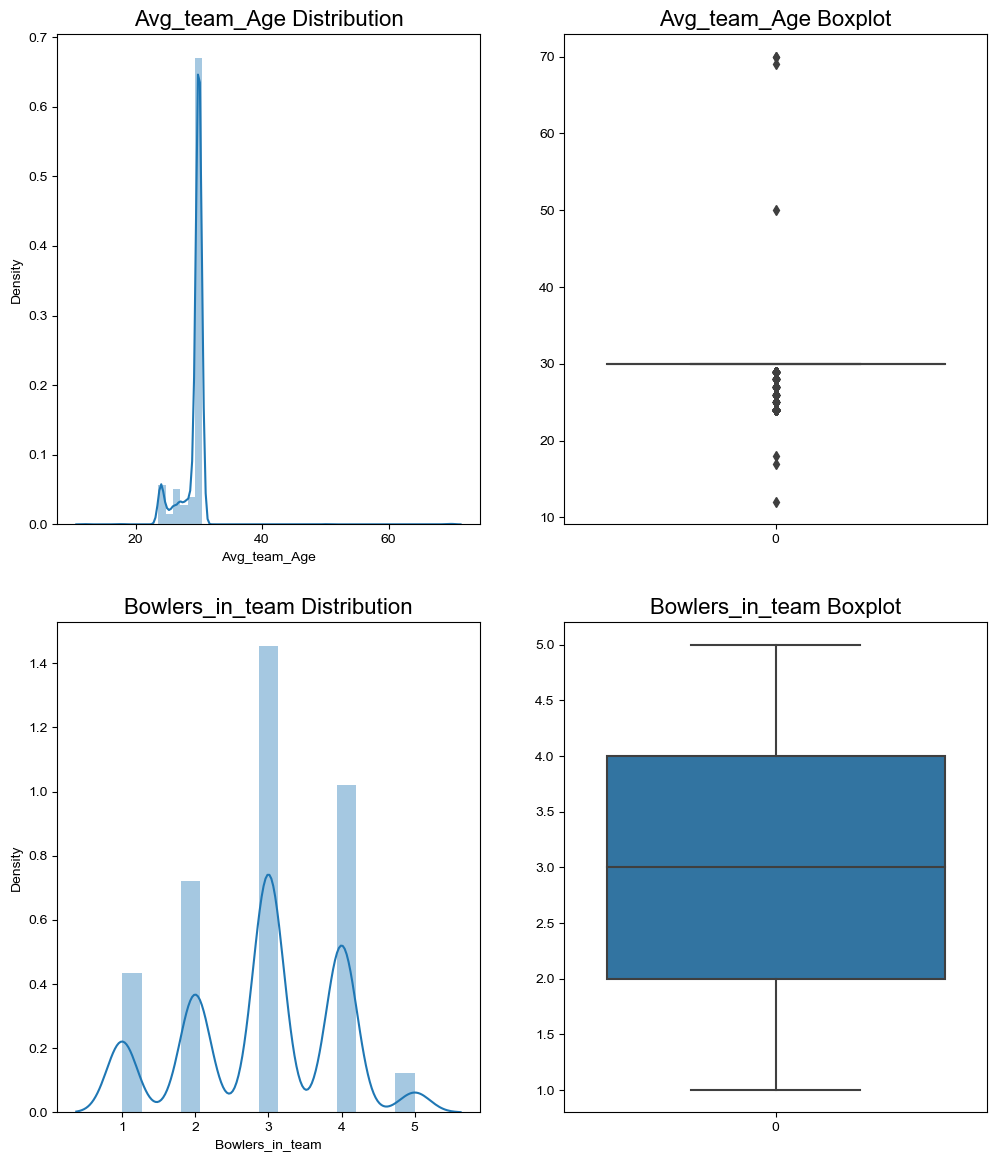

In [22]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(df_c2['Avg_team_Age'] , ax=axes[0][0])
a.set_title("Avg_team_Age Distribution",fontsize=16)
a = sns.boxplot(df_c2['Avg_team_Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Avg_team_Age Boxplot",fontsize=16)
a = sns.distplot(df_c2['Bowlers_in_team'] , ax=axes[1][0])
a.set_title("Bowlers_in_team Distribution",fontsize=16)
a = sns.boxplot(df_c2['Bowlers_in_team'] , orient = "v" , ax=axes[1][1])
a.set_title("Bowlers_in_team Boxplot",fontsize=16)
sns.set(font_scale=1.4)
plt.show()

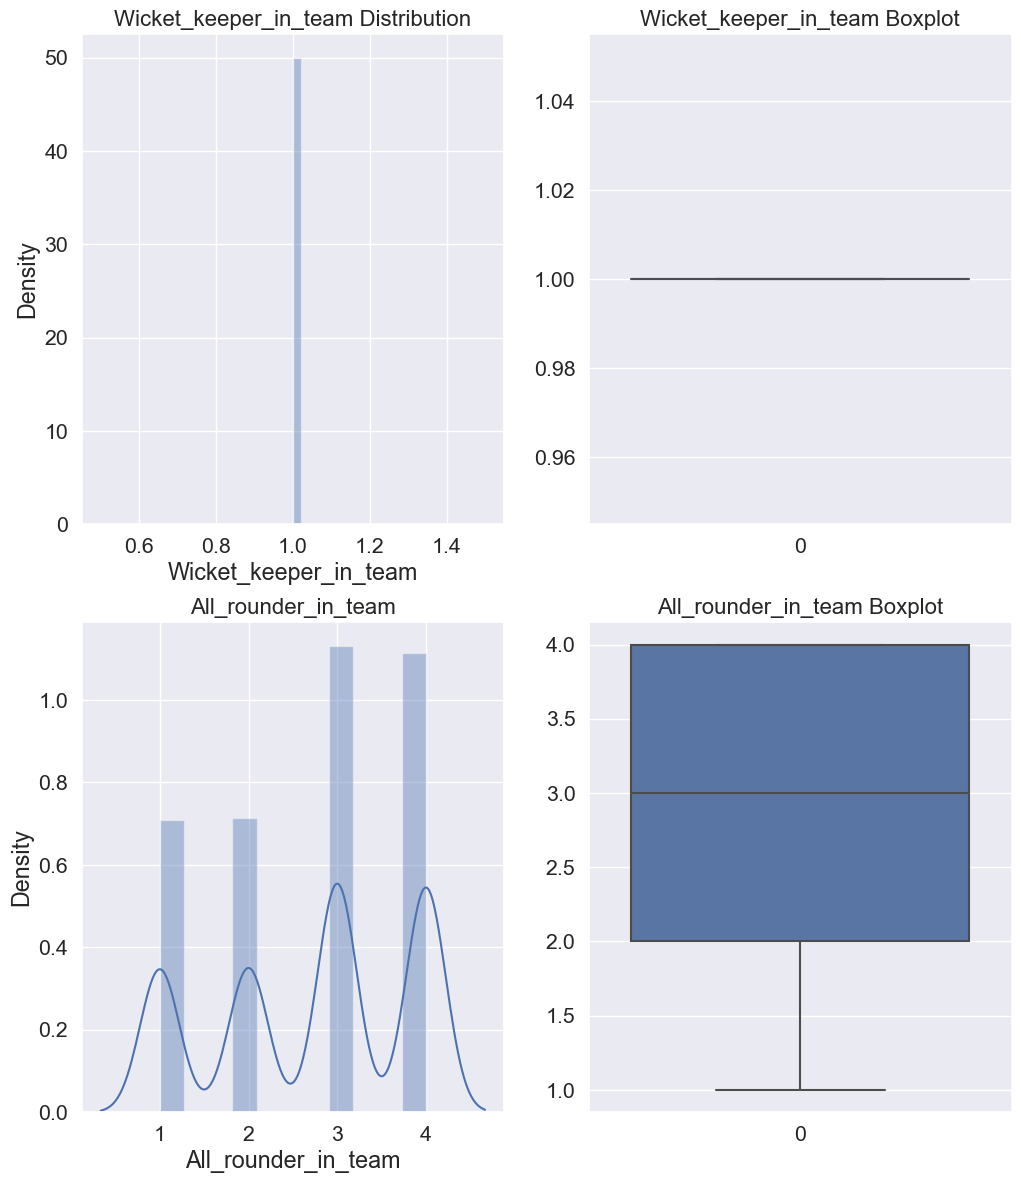

In [23]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(df_c2['Wicket_keeper_in_team'] , ax=axes[0][0])
a.set_title("Wicket_keeper_in_team Distribution",fontsize=16)
a = sns.boxplot(df_c2['Wicket_keeper_in_team'] , orient = "v" , ax=axes[0][1])
a.set_title("Wicket_keeper_in_team Boxplot",fontsize=16)
a = sns.distplot(df_c2['All_rounder_in_team'] , ax=axes[1][0])
a.set_title("All_rounder_in_team",fontsize=16)
a = sns.boxplot(df_c2['All_rounder_in_team'] , orient = "v" , ax=axes[1][1])
a.set_title("All_rounder_in_team Boxplot",fontsize=16)
sns.set(font_scale=1.4)
plt.show()

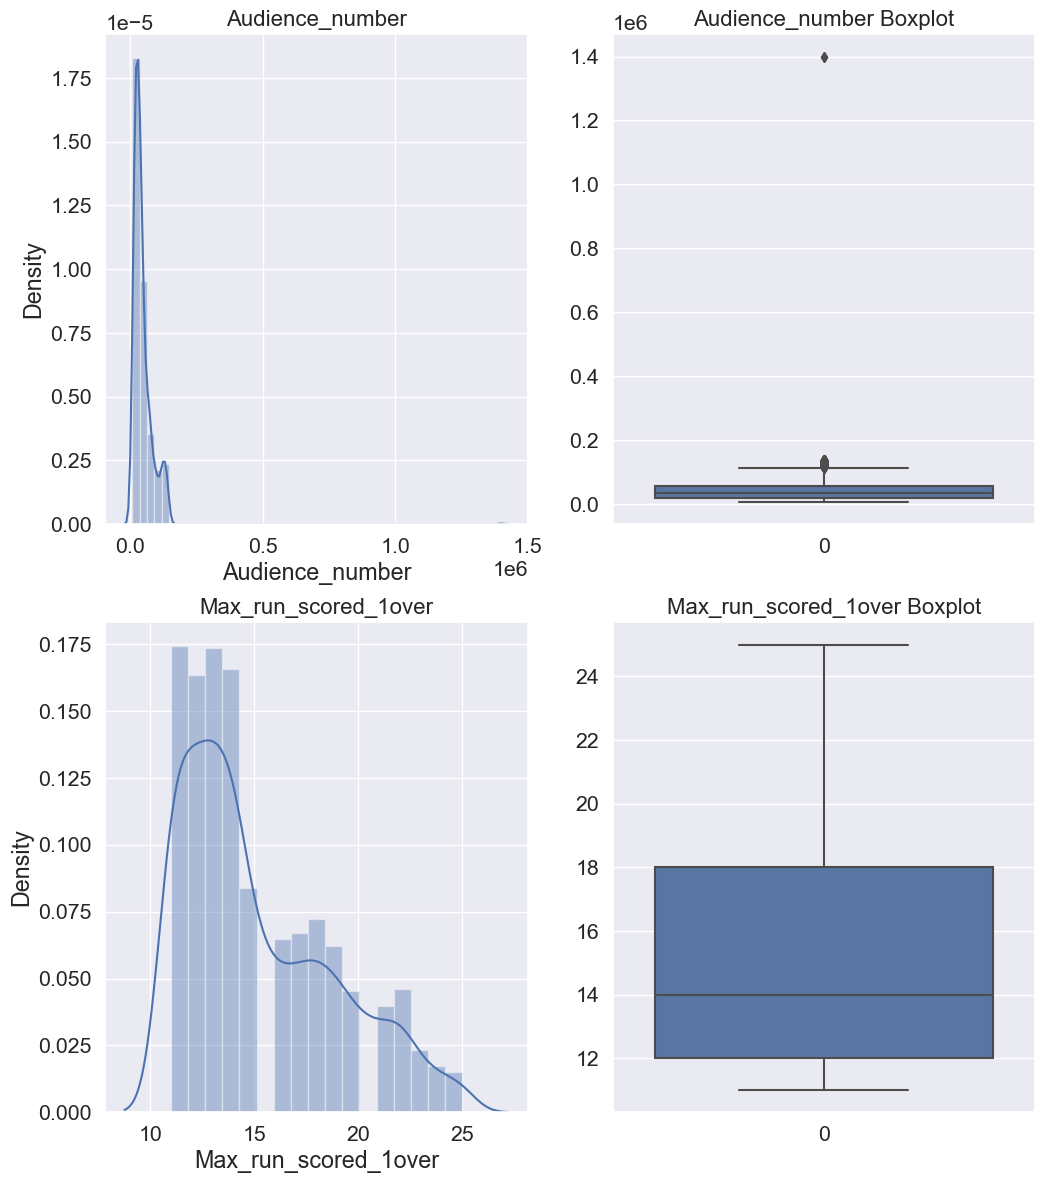

In [24]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(df_c2['Audience_number'] , ax=axes[0][0])
a.set_title("Audience_number",fontsize=16)
a = sns.boxplot(df_c2['Audience_number'] , orient = "v" , ax=axes[0][1])
a.set_title("Audience_number Boxplot",fontsize=16)
a = sns.distplot(df_c2['Max_run_scored_1over'] , ax=axes[1][0])
a.set_title("Max_run_scored_1over",fontsize=16)
a = sns.boxplot(df_c2['Max_run_scored_1over'] , orient = "v" , ax=axes[1][1])
a.set_title("Max_run_scored_1over Boxplot",fontsize=16)
sns.set(font_scale=1.4)
plt.show()

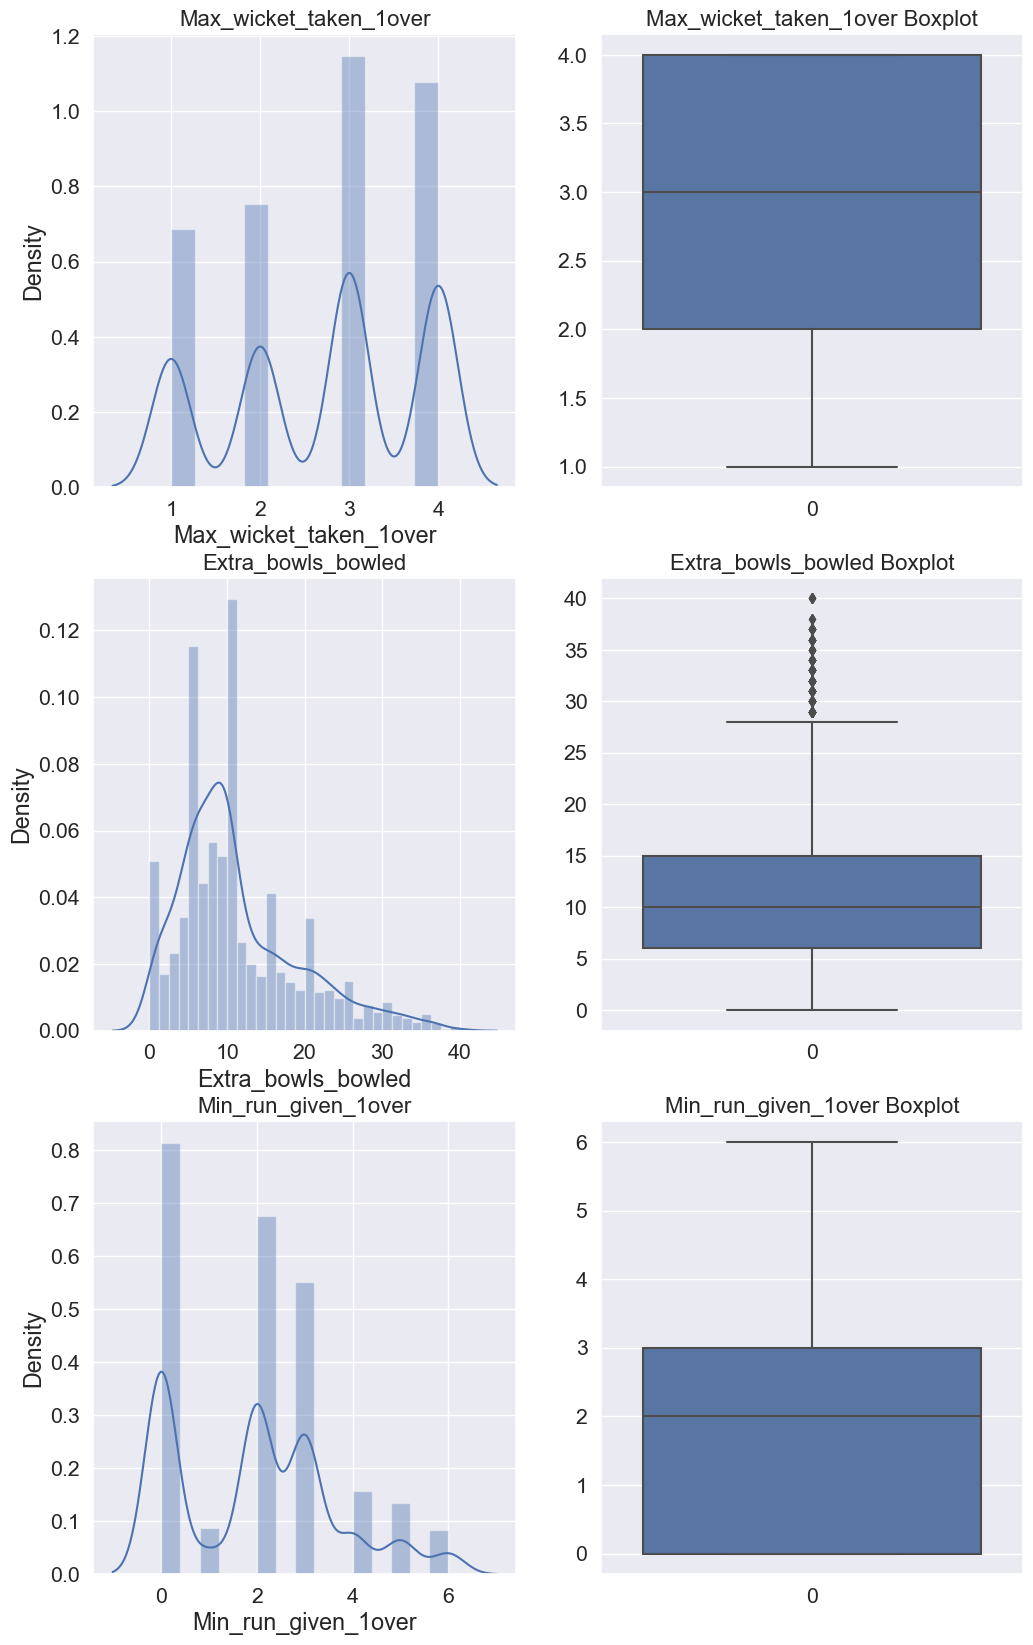

In [25]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(12,20)
a = sns.distplot(df_c2['Max_wicket_taken_1over'] , ax=axes[0][0])
a.set_title("Max_wicket_taken_1over",fontsize=16)
a = sns.boxplot(df_c2['Max_wicket_taken_1over'] , orient = "v" , ax=axes[0][1])
a.set_title("Max_wicket_taken_1over Boxplot",fontsize=16)
a = sns.distplot(df_c2['Extra_bowls_bowled'] , ax=axes[1][0])
a.set_title("Extra_bowls_bowled",fontsize=16)
a = sns.boxplot(df_c2['Extra_bowls_bowled'] , orient = "v" , ax=axes[1][1])
a.set_title("Extra_bowls_bowled Boxplot",fontsize=16)
a = sns.distplot(df_c2['Min_run_given_1over'] , ax=axes[2][0])
a.set_title("Min_run_given_1over",fontsize=16)
a = sns.boxplot(df_c2['Min_run_given_1over'] , orient = "v" , ax=axes[2][1])
a.set_title("Min_run_given_1over Boxplot",fontsize=16)
sns.set(font_scale=1.4)
plt.show()


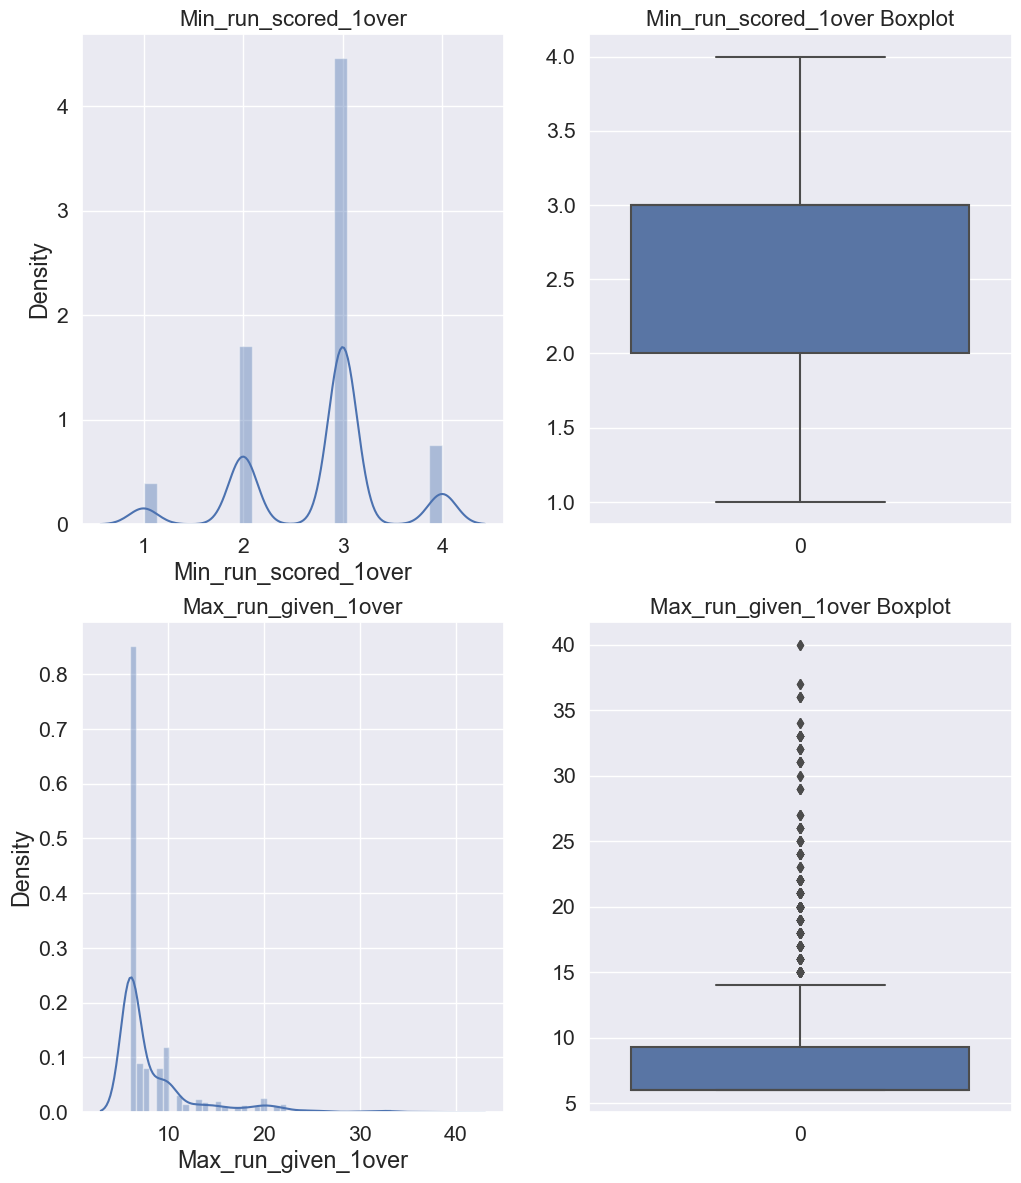

In [26]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(df_c2['Min_run_scored_1over'] , ax=axes[0][0])
a.set_title("Min_run_scored_1over",fontsize=16)
a = sns.boxplot(df_c2['Min_run_scored_1over'] , orient = "v" , ax=axes[0][1])
a.set_title("Min_run_scored_1over Boxplot",fontsize=16)
a = sns.distplot(df_c2['Max_run_given_1over'] , ax=axes[1][0])
a.set_title("Max_run_given_1over",fontsize=16)
a = sns.boxplot(df_c2['Max_run_given_1over'] , orient = "v" , ax=axes[1][1])
a.set_title("Max_run_given_1over Boxplot",fontsize=16)
sns.set(font_scale=1.4)
plt.show()


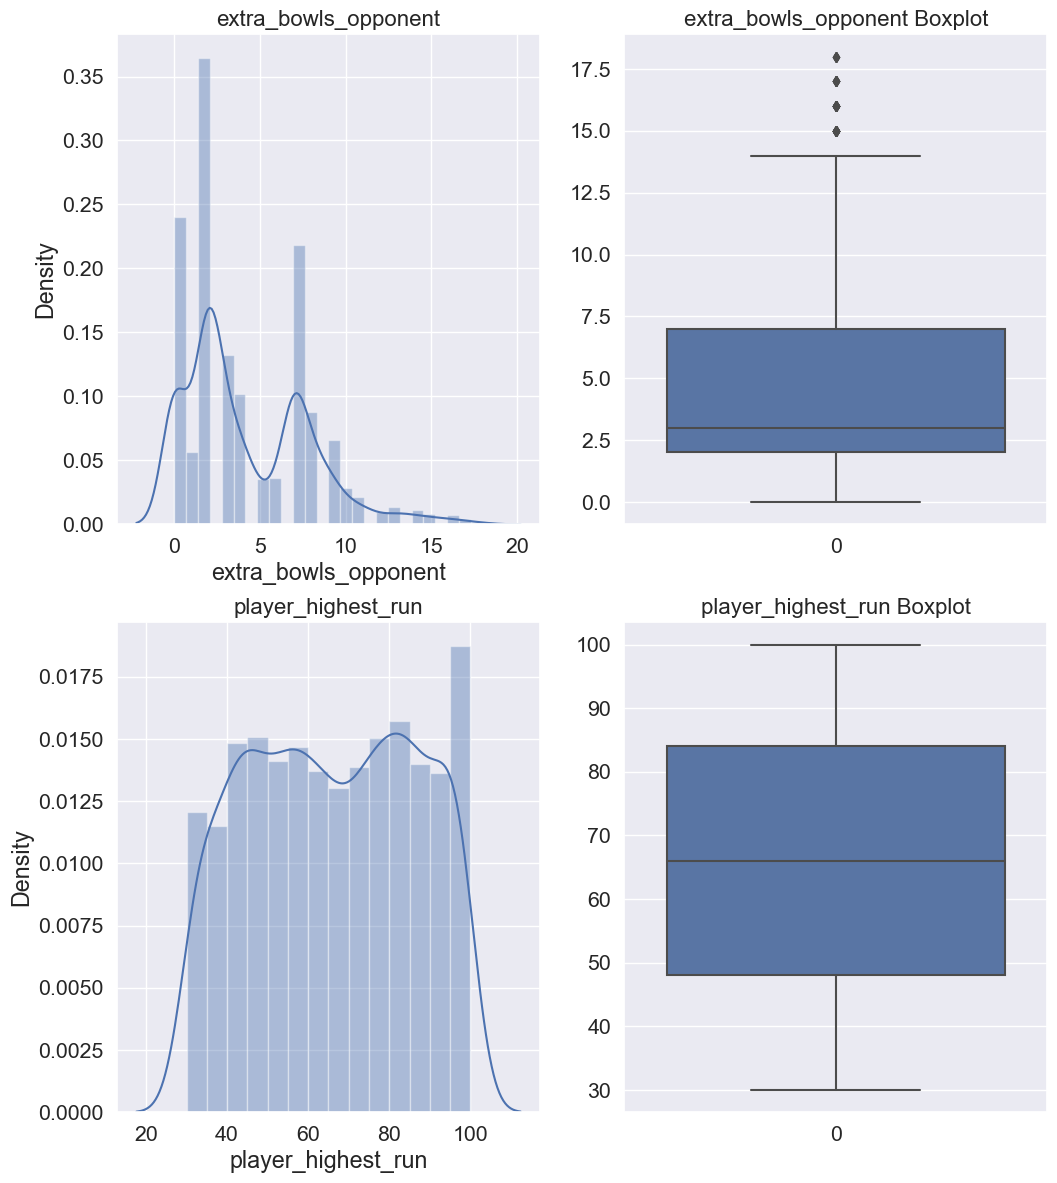

In [27]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,14)
a = sns.distplot(df_c2['extra_bowls_opponent'] , ax=axes[0][0])
a.set_title("extra_bowls_opponent",fontsize=16)
a = sns.boxplot(df_c2['extra_bowls_opponent'] , orient = "v" , ax=axes[0][1])
a.set_title("extra_bowls_opponent Boxplot",fontsize=16)
a = sns.distplot(df_c2['player_highest_run'] , ax=axes[1][0])
a.set_title("player_highest_run",fontsize=16)
a = sns.boxplot(df_c2['player_highest_run'] , orient = "v" , ax=axes[1][1])
a.set_title("player_highest_run Boxplot",fontsize=16)
sns.set(font_scale=1.4)
plt.show()


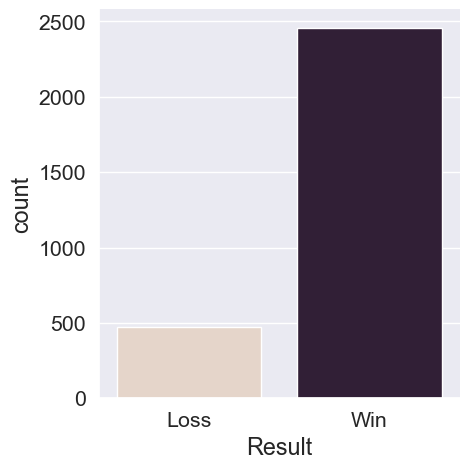

In [28]:
sns.catplot(x='Result', kind="count", palette="ch:.15", data=df_c2)

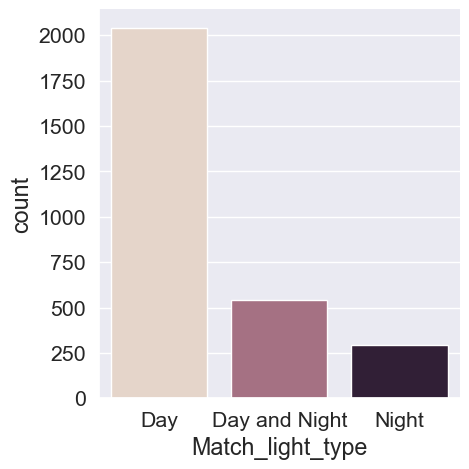

In [29]:
sns.catplot(x='Match_light_type', kind="count", palette="ch:.15", data=df_c2)

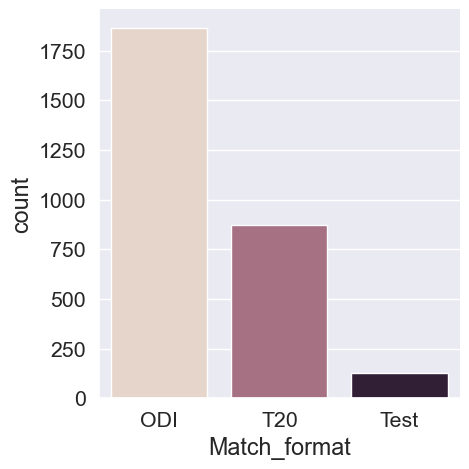

In [30]:
sns.catplot(x='Match_format', kind="count", palette="ch:.15", data=df_c2)

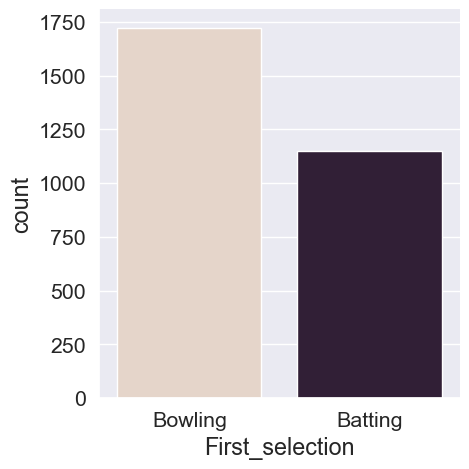

In [31]:
sns.catplot(x='First_selection', kind="count", palette="ch:.15", data=df_c2)

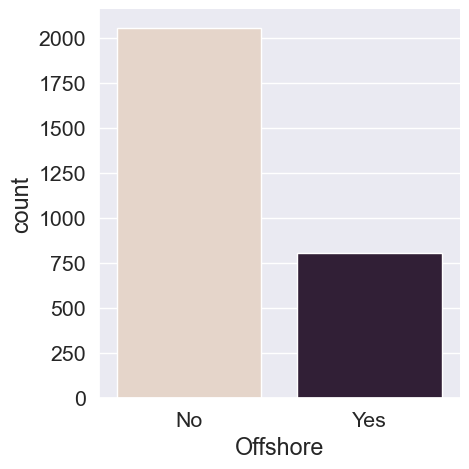

In [32]:
sns.catplot(x='Offshore', kind="count", palette="ch:.15", data=df_c2)

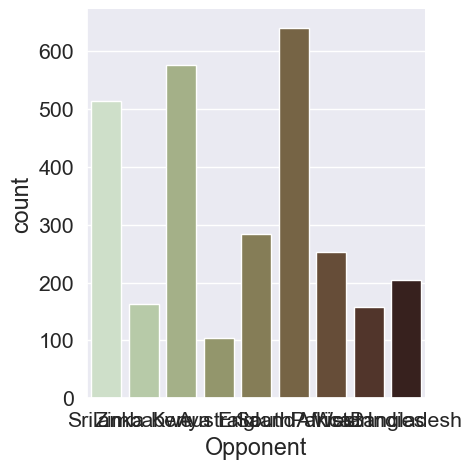

In [33]:
sns.catplot(x='Opponent', kind="count", palette="ch:.8", data=df_c2)

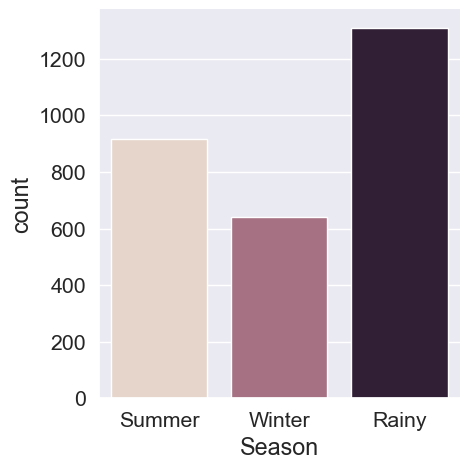

In [34]:
sns.catplot(x='Season', kind="count", palette="ch:.15", data=df_c2)

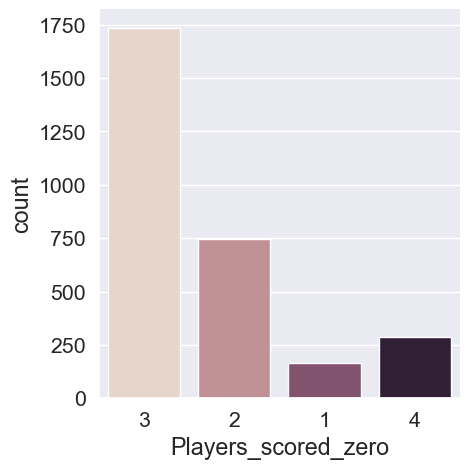

In [35]:
sns.catplot(x='Players_scored_zero', kind="count", palette="ch:.15", data=df_c2)

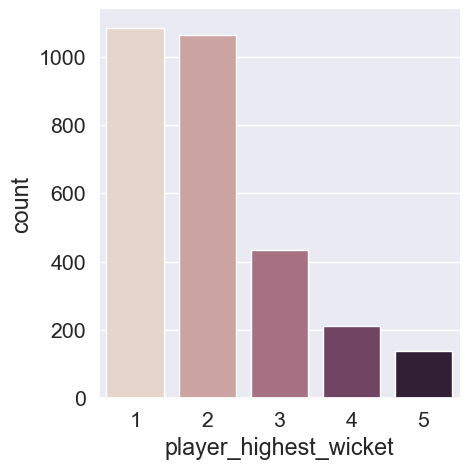

In [36]:
sns.catplot(x='player_highest_wicket', kind="count", palette="ch:.15", data=df_c2)

b) Bivariate analysis (relationship between different variables, correlations)

<Figure size 1200x1200 with 0 Axes>

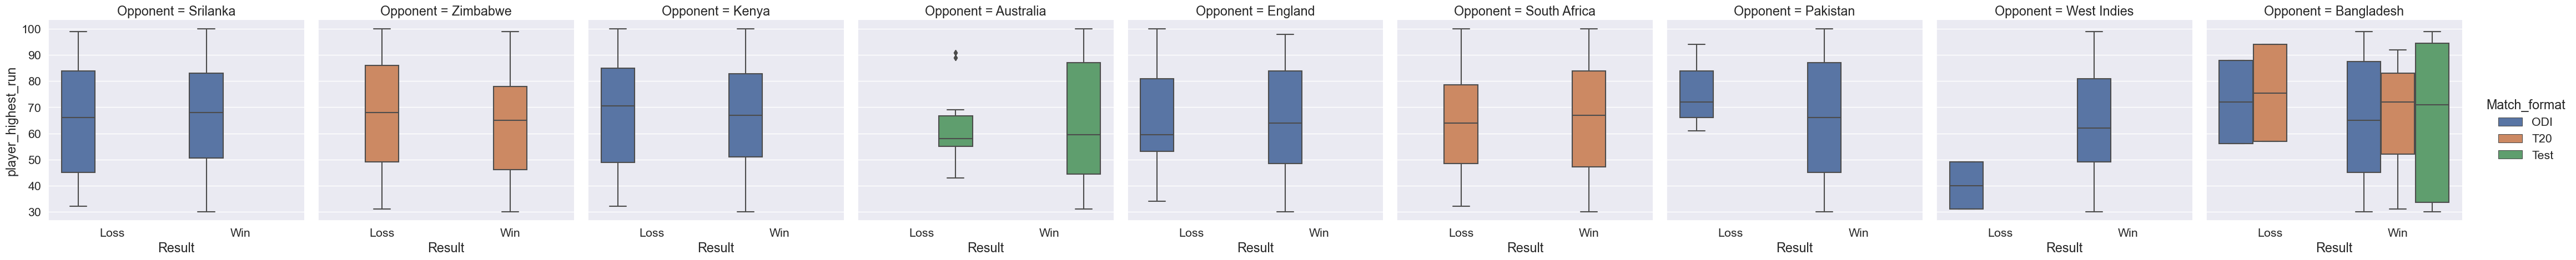

In [37]:
plt.figure(figsize=(12,12))
sns.catplot(x="Result",
    y = "player_highest_run",
    hue="Match_format",
    col="Opponent",
    data=df_c2,
    kind="box");
sns.set(font_scale=1.4)
plt.show()

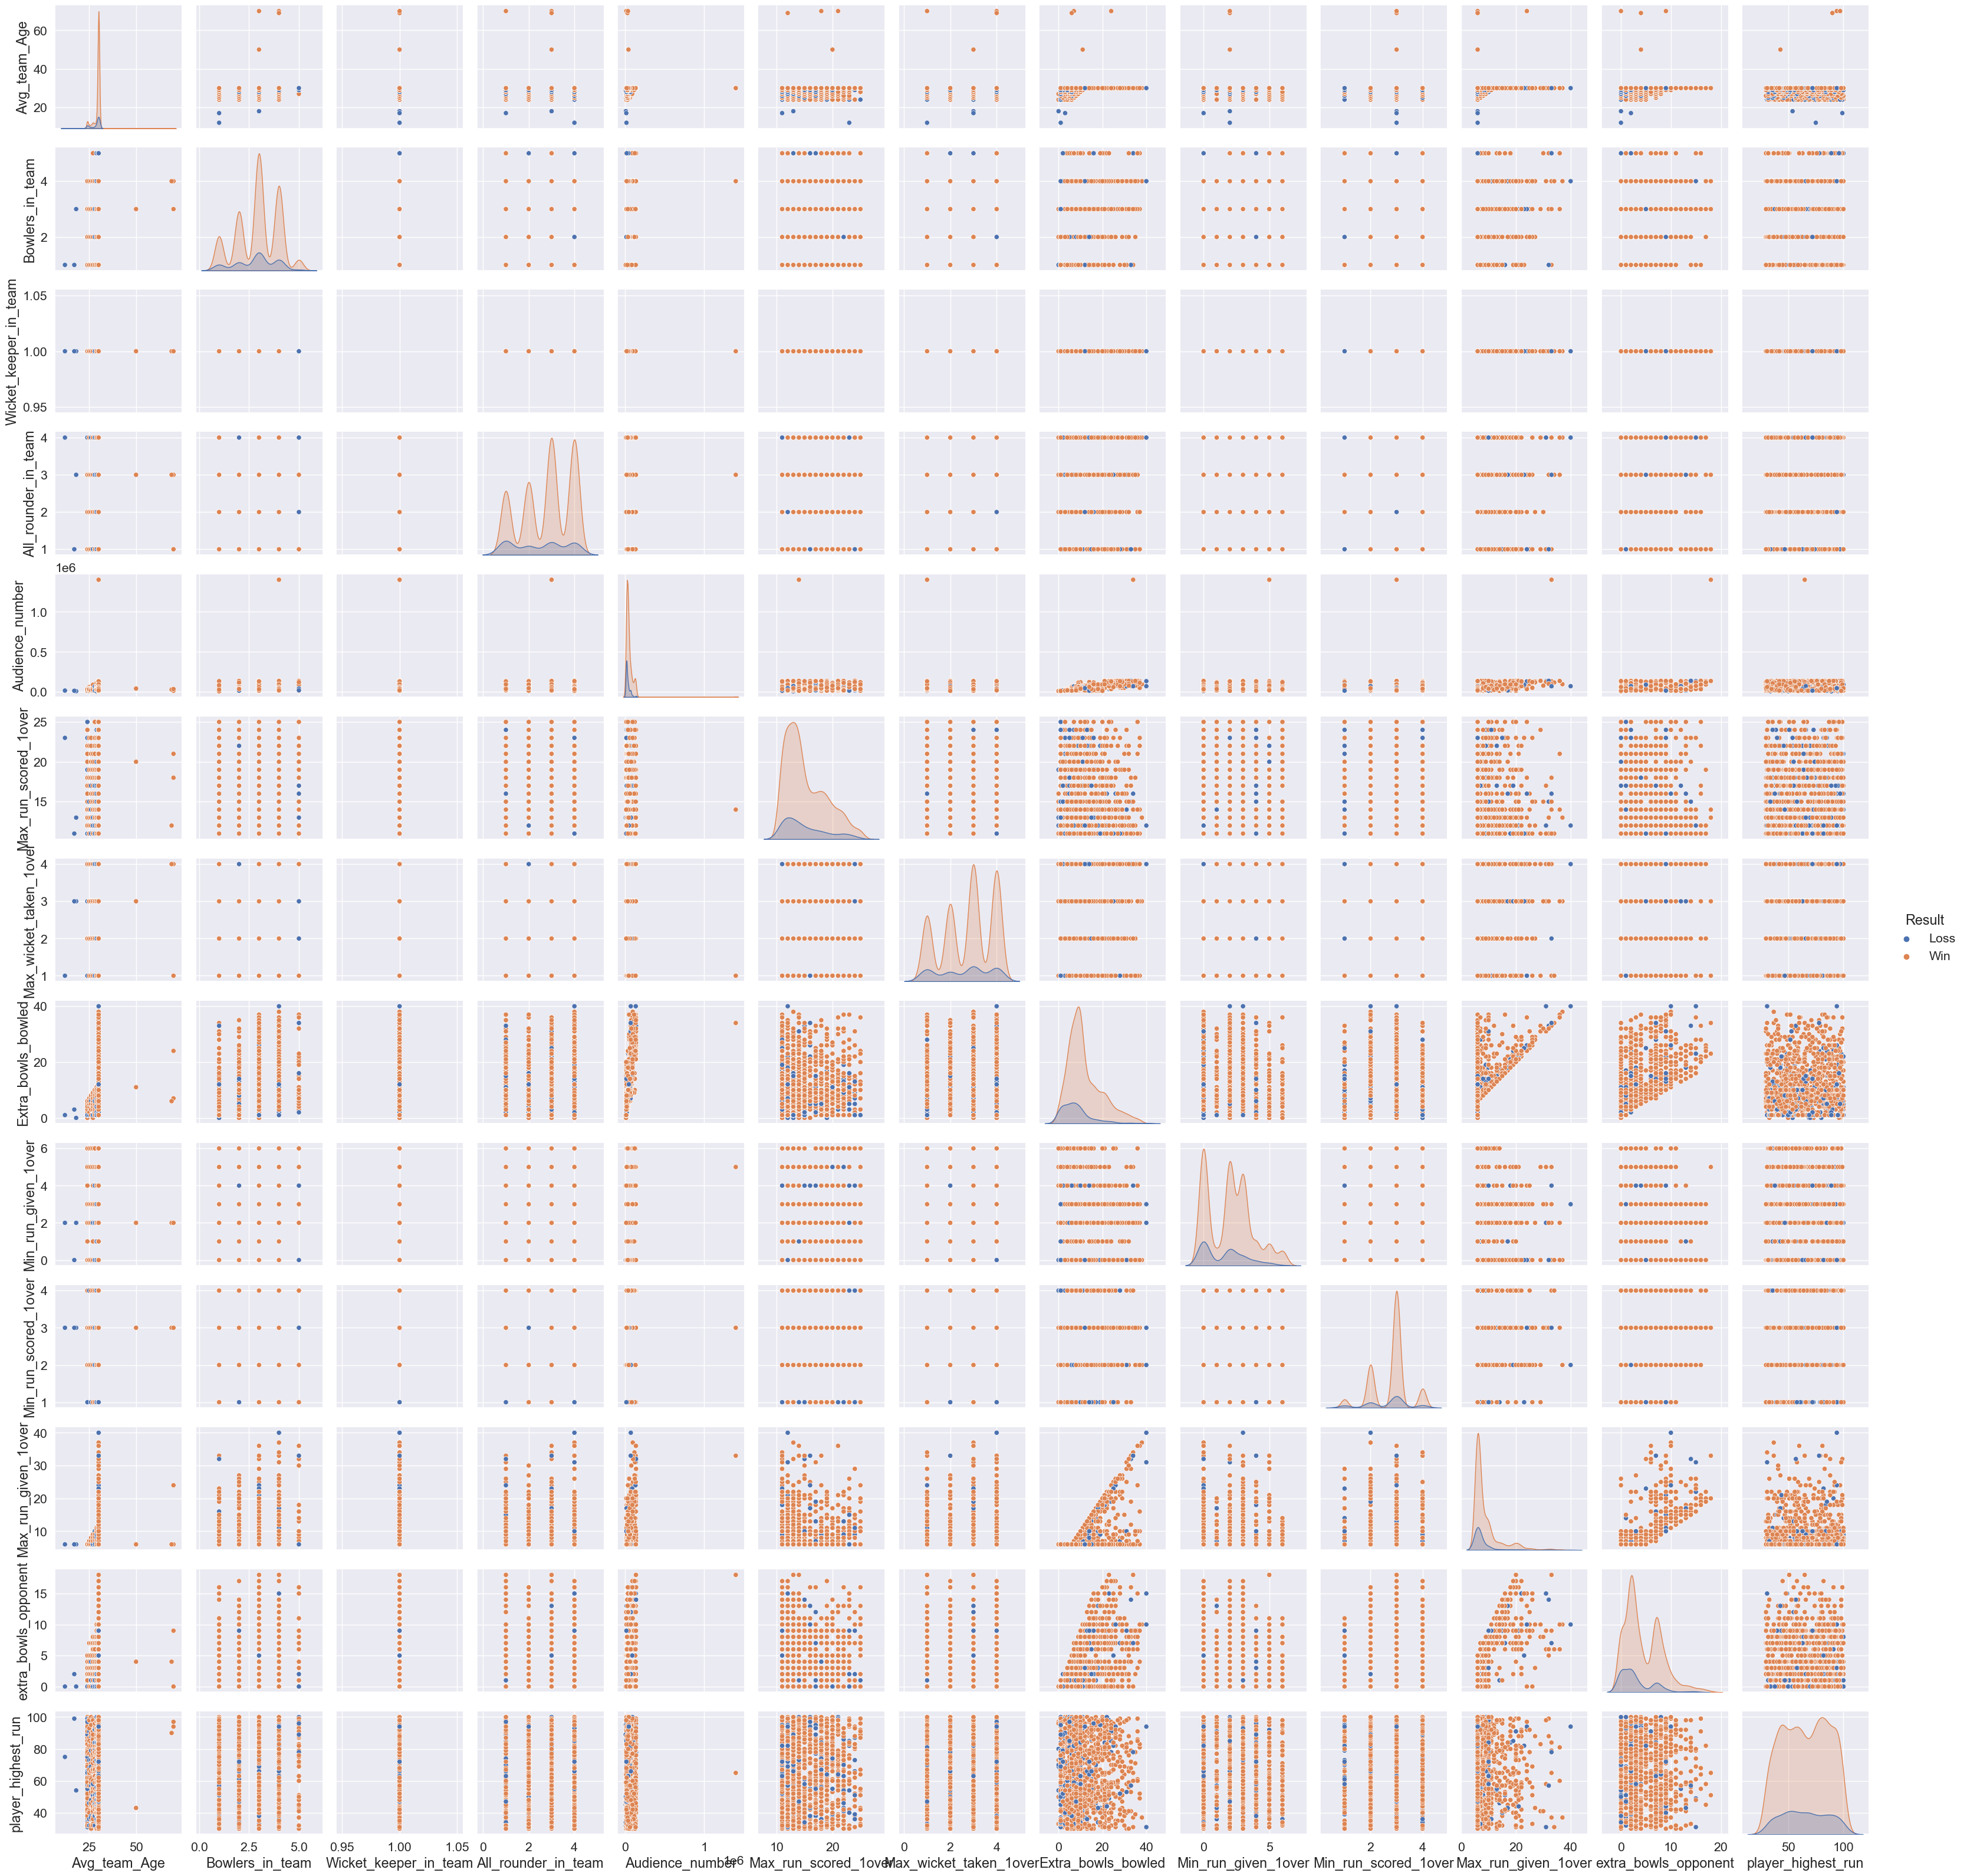

In [38]:
sns.pairplot(df_c2,hue="Result")

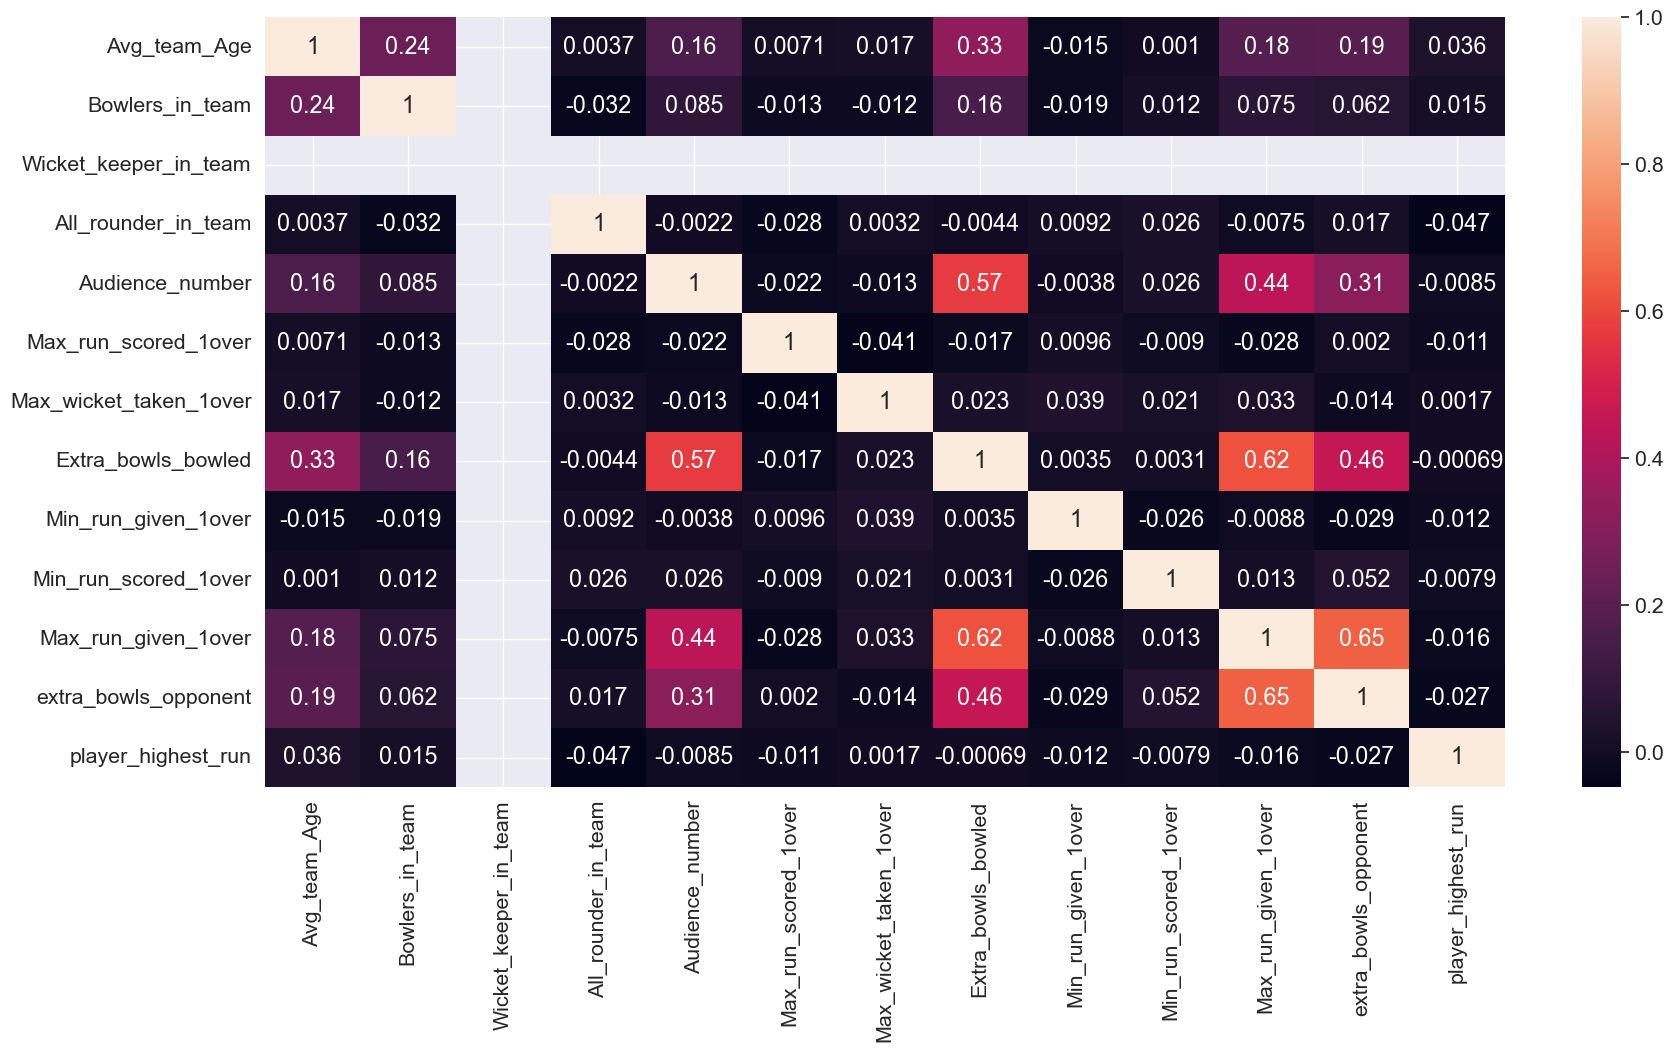

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(df_c2.corr(),annot=True)
plt.show()

a) Removal of unwanted variables (if applicable

In [40]:
df_c2 = df_c2.drop(['Game_number'],axis = 1)

In [41]:
df_c2.columns

Index(['Result', 'Avg_team_Age', 'Match_light_type', 'Match_format',
       'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team',
       'First_selection', 'Opponent', 'Season', 'Audience_number', 'Offshore',
       'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero',
       'player_highest_wicket'],
      dtype='object')

INFERENCE: Removed 'Game_number' as unwanted variable


b) Missing Value treatment (if applicable)
Check for missing values

In [42]:
df_c2.isnull().sum()

Result                     0
Avg_team_Age              97
Match_light_type          52
Match_format              70
Bowlers_in_team           82
Wicket_keeper_in_team      0
All_rounder_in_team       40
First_selection           59
Opponent                  36
Season                    62
Audience_number           81
Offshore                  64
Max_run_scored_1over      28
Max_wicket_taken_1over     0
Extra_bowls_bowled        29
Min_run_given_1over        0
Min_run_scored_1over      27
Max_run_given_1over       34
extra_bowls_opponent       0
player_highest_run        28
Players_scored_zero        0
player_highest_wicket      0
dtype: int64

In [43]:
df_c2.isnull().sum().sum()

789

Missing values removal
Impute missing values with median for numerical values
Impute missing values with mode for categorical values

In [44]:
for column in df_c2.columns:
    if df_c2[column].dtype != 'object':
        median = df_c2[column].median()
        df_c2[column] = df_c2[column].fillna(median)

In [45]:
mode1=df_c2["Match_light_type"].mode().values[0]
mode2=df_c2["Match_format"].mode().values[0]
mode3=df_c2["First_selection"].mode().values[0]
mode4=df_c2["Opponent"].mode().values[0]
mode5=df_c2["Season"].mode().values[0]
mode6=df_c2['Offshore'].mode().values[0]
df_c2["Match_light_type"]=df_c2["Match_light_type"].replace(np.nan,mode1)
df_c2["Match_format"]= df_c2["Match_format"].replace(np.nan,mode2)
df_c2['First_selection']=df_c2['First_selection'].replace(np.nan,mode3)
df_c2['Opponent']=df_c2['Opponent'].replace(np.nan,mode4)
df_c2['Season']=df_c2['Season'].replace(np.nan,mode5)
df_c2['Offshore']=df_c2['Offshore'].replace(np.nan,mode6)

In [46]:
df_c2.isnull().sum()

Result                    0
Avg_team_Age              0
Match_light_type          0
Match_format              0
Bowlers_in_team           0
Wicket_keeper_in_team     0
All_rounder_in_team       0
First_selection           0
Opponent                  0
Season                    0
Audience_number           0
Offshore                  0
Max_run_scored_1over      0
Max_wicket_taken_1over    0
Extra_bowls_bowled        0
Min_run_given_1over       0
Min_run_scored_1over      0
Max_run_given_1over       0
extra_bowls_opponent      0
player_highest_run        0
Players_scored_zero       0
player_highest_wicket     0
dtype: int64

In [47]:
df_c2.isnull().sum().sum()

0

d) Outlier treatment (if required)

'Avg_team_Age', 'Bowlers_in_team', 'All_rounder_in_team', 'Audience_number', 'Max_run_scored_1over',
'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over',
'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run']

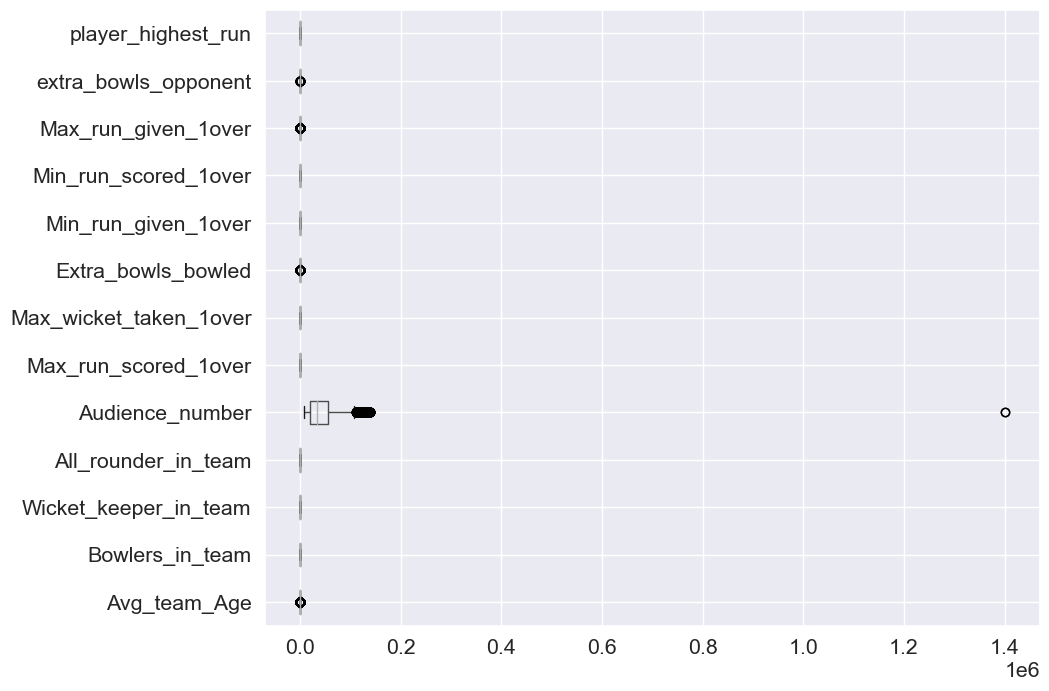

In [48]:
# construct box plot for continuous variables
plt.figure(figsize=(10,8))
df_c2[num].boxplot(vert=0)
plt.show()

INFERENCE: Outliers are there in Avg_team_age, Audience_number, Extra_bowls_bowled,
Max_run_given_1over, extra_bowls_opponent. Remaining variables have no outliers.


Outlier Treatment

In [49]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

<Axes: >

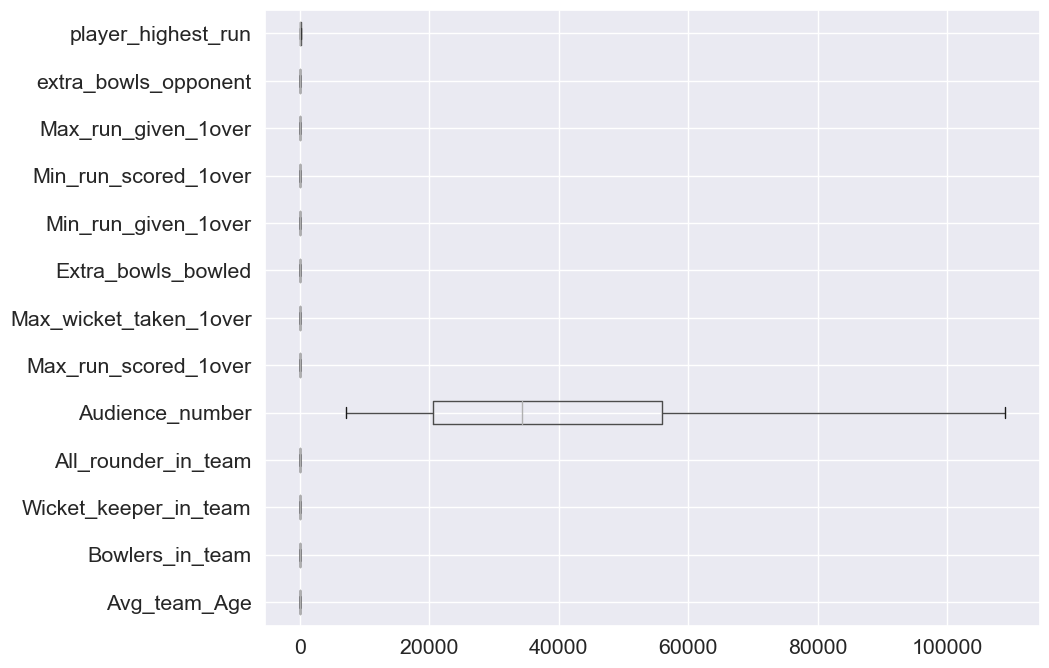

In [50]:
lrage,urage=remove_outlier(df_c2['Avg_team_Age'])
df_c2['Avg_team_Age']=np.where(df_c2['Avg_team_Age']>urage,urage,df_c2['Avg_team_Age'])
df_c2['Avg_team_Age']=np.where(df_c2['Avg_team_Age']<lrage,lrage,df_c2['Avg_team_Age'])
lraudience,uraudience=remove_outlier(df_c2['Audience_number'])
df_c2['Audience_number']=np.where(df_c2['Audience_number']>uraudience,uraudience,df_c2['Audience_number'])
df_c2['Audience_number']=np.where(df_c2['Audience_number']<lraudience,lraudience,df_c2['Audience_number'])
lropp,uropp=remove_outlier(df_c2['extra_bowls_opponent'])
df_c2['extra_bowls_opponent']=np.where(df_c2['extra_bowls_opponent']>uropp,uropp,df_c2['extra_bowls_opponent'])
df_c2['extra_bowls_opponent']=np.where(df_c2['extra_bowls_opponent']<lropp,lropp,df_c2['extra_bowls_opponent'])
lrbowl,urbowl=remove_outlier(df_c2['Extra_bowls_bowled'])
df_c2['Extra_bowls_bowled']=np.where(df_c2['Extra_bowls_bowled']>urbowl,urbowl,df_c2['Extra_bowls_bowled'])
df_c2['Extra_bowls_bowled']=np.where(df_c2['Extra_bowls_bowled']<lrbowl,urbowl,df_c2['Extra_bowls_bowled'])
lrrun,urrun=remove_outlier(df_c2['Max_run_given_1over'])
df_c2['Max_run_given_1over']=np.where(df_c2['Max_run_given_1over']>urrun,urrun,df_c2['Max_run_given_1over'])
df_c2['Max_run_given_1over']=np.where(df_c2['Max_run_given_1over']<lrrun,lrrun,df_c2['Max_run_given_1over'])
plt.figure(figsize=(10,8))
df_c2[num].boxplot(vert=0)

There are outliers present in 5 numerical columns. The outliers were treated by IQR.

In [51]:
df_c2.shape

(2930, 22)

e) Variable transformation (if applicable)


Variable transformation for categorical variables by using LABEL ENCODING

In [52]:
from sklearn.preprocessing import LabelEncoder # import label encoder
labelencoder = LabelEncoder()
df_c2['Result'] = labelencoder.fit_transform(df_c2.Result)
df_c2['Match_light_type'] = labelencoder.fit_transform(df_c2.Match_light_type)
df_c2['Match_format'] = labelencoder.fit_transform(df_c2.Match_format)
df_c2['First_selection'] = labelencoder.fit_transform(df_c2.First_selection)
df_c2['Opponent'] = labelencoder.fit_transform(df_c2.Opponent)
df_c2['Season'] = labelencoder.fit_transform(df_c2.Season)
df_c2['Offshore'] = labelencoder.fit_transform(df_c2.Offshore)
df_c2['Players_scored_zero'] = labelencoder.fit_transform(df_c2.Players_scored_zero)
df_c2['player_highest_wicket'] = labelencoder.fit_transform(df_c2.player_highest_wicket)

In [53]:
print('Result \n',df_c2.Result.value_counts())
print('\n')
print('Match_light_type \n',df_c2.Match_light_type.value_counts())
print('\n')
print('Match_format \n',df_c2.Match_format.value_counts())
print('\n')
print('First_selcetion \n',df_c2.First_selection.value_counts())
print('\n')
print('Opponent \n',df_c2.Opponent.value_counts())
print('\n')
print('Season \n',df_c2.Season.value_counts())
print('\n')
print('Offshore \n',df_c2.Offshore.value_counts())
print('\n')
print('Players_scored_zero \n',df_c2.Players_scored_zero.value_counts())
print('\n')
print('player_highest_wicket \n',df_c2.player_highest_wicket.value_counts())
print('\n')

Result 
 1    2457
0     473
Name: Result, dtype: int64


Match_light_type 
 0    2093
1     541
2     296
Name: Match_light_type, dtype: int64


Match_format 
 0    1935
1     870
2     125
Name: Match_format, dtype: int64


First_selcetion 
 1    1781
0    1149
Name: First_selection, dtype: int64


Opponent 
 5    676
3    576
6    513
2    283
4    253
1    204
8    163
7    158
0    104
Name: Opponent, dtype: int64


Season 
 0    1371
1     918
2     641
Name: Season, dtype: int64


Offshore 
 0    2121
1     809
Name: Offshore, dtype: int64


Players_scored_zero 
 2    1735
1     744
3     285
0     166
Name: Players_scored_zero, dtype: int64


player_highest_wicket 
 0    1084
1    1063
2     434
3     211
4     138
Name: player_highest_wicket, dtype: int64




VARIANCE INFLATION FACTOR

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df_c2[['Result', 'Avg_team_Age','Match_light_type','Match_format','Bowlers_in_team',
           'All_rounder_in_team','Wicket_keeper_in_team', 'First_selection','Opponent','Season',
           'Audience_number','Offshore','Max_run_scored_1over','Max_wicket_taken_1over','Extra_bowls_bowled',
           'Min_run_given_1over','Min_run_scored_1over','Max_run_given_1over','extra_bowls_opponent',
           'player_highest_run','Players_scored_zero','player_highest_wicket']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

                   feature       VIF
0                   Result  1.184994
1             Avg_team_Age  0.000000
2         Match_light_type  1.014881
3             Match_format  1.545418
4          Bowlers_in_team  1.028235
5      All_rounder_in_team  1.030228
6    Wicket_keeper_in_team  0.000000
7          First_selection  1.008614
8                 Opponent  1.165731
9                   Season  1.010222
10         Audience_number  7.097595
11                Offshore  1.090127
12    Max_run_scored_1over  1.008721
13  Max_wicket_taken_1over  1.016987
14      Extra_bowls_bowled  3.084353
15     Min_run_given_1over  1.616754
16    Min_run_scored_1over  1.019664
17     Max_run_given_1over  3.036599
18    extra_bowls_opponent  2.663806
19      player_highest_run  1.010529
20     Players_scored_zero  1.029654
21   player_highest_wicket  8.096399


Dropping columns with VIF>5 

In [55]:
df_c2 = df_c2.drop(['player_highest_wicket'],axis = 1)

In [56]:
df_c2 = df_c2.drop(['Audience_number'],axis = 1)

Variable transformation for numerical variables by using standard scaler (Scaling of the
data

e.Transformation on the data using Standard Scaler

In [57]:
#Scales the data. Essentially returns the z-scores of every attribute
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
X

StandardScaler()

In [58]:
df_sc_cl = df_c2.copy()

In [59]:
df_sc_cl.head()

Result  Avg_team_Age  Match_light_type  Match_format  Bowlers_in_team  \
0       0          30.0                 0             0              3.0   
1       1          30.0                 0             1              3.0   
2       0          30.0                 1             1              3.0   
3       1          30.0                 0             0              2.0   
4       0          30.0                 2             0              1.0   

   Wicket_keeper_in_team  All_rounder_in_team  First_selection  Opponent  \
0                      1                  3.0                1         6   
1                      1                  4.0                0         8   
2                      1                  2.0                1         8   
3                      1                  2.0                1         3   
4                      1                  3.0                1         6   

   Season  Offshore  Max_run_scored_1over  Max_wicket_taken_1over  \
0       1         0                  13.0                       3   
1       1         0                  12.0                       1   
2       0         1                  14.0                       4   
3       1         0                  15.0                       4   
4       1         0                  12.0                       4   

   Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                 0.0                    2                   3.0   
1                 0.0                    0                   3.0   
2                 0.0                    0                   3.0   
3                 0.0                    2                   3.0   
4                 0.0                    0                   3.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                   0.0                54.0   
1                  6.0                   0.0                69.0   
2                  6.0                   0.0                69.0   
3                  6.0                   0.0                73.0   
4                  6.0                   0.0                80.0   

   Players_scored_zero  
0                    2  
1                    1  
2                    2  
3                    2  
4                    2

In [60]:
df_sc_cl.columns

Index(['Result', 'Avg_team_Age', 'Match_light_type', 'Match_format',
       'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team',
       'First_selection', 'Opponent', 'Season', 'Offshore',
       'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled',
       'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over',
       'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero'],
      dtype='object')

In [61]:
scaled_df = X.fit_transform(df_c2)

In [62]:
scaled_df

array([[-2.27914527,  0.        , -0.58348128, ..., -1.18289104,
        -0.58774114,  0.37991943],
       [ 0.43876097,  0.        , -0.58348128, ..., -1.18289104,
         0.15370446, -1.02736745],
       [-2.27914527,  0.        ,  0.92543323, ..., -1.18289104,
         0.15370446,  0.37991943],
       ...,
       [ 0.43876097,  0.        ,  0.92543323, ..., -0.62070601,
         0.69743123,  0.37991943],
       [ 0.43876097,  0.        , -0.58348128, ..., -0.33961349,
         1.58716594,  0.37991943],
       [ 0.43876097,  0.        , -0.58348128, ..., -0.33961349,
        -0.19230349, -2.43465432]])

Checking for Correlations

In [63]:
cat=[]
num=[]
for i in df_c2.columns:
    if df_c2[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

[]
['Result', 'Avg_team_Age', 'Match_light_type', 'Match_format', 'Bowlers_in_team', 'Wicket_keeper_in_team', 'All_rounder_in_team', 'First_selection', 'Opponent', 'Season', 'Offshore', 'Max_run_scored_1over', 'Max_wicket_taken_1over', 'Extra_bowls_bowled', 'Min_run_given_1over', 'Min_run_scored_1over', 'Max_run_given_1over', 'extra_bowls_opponent', 'player_highest_run', 'Players_scored_zero']


<Axes: >

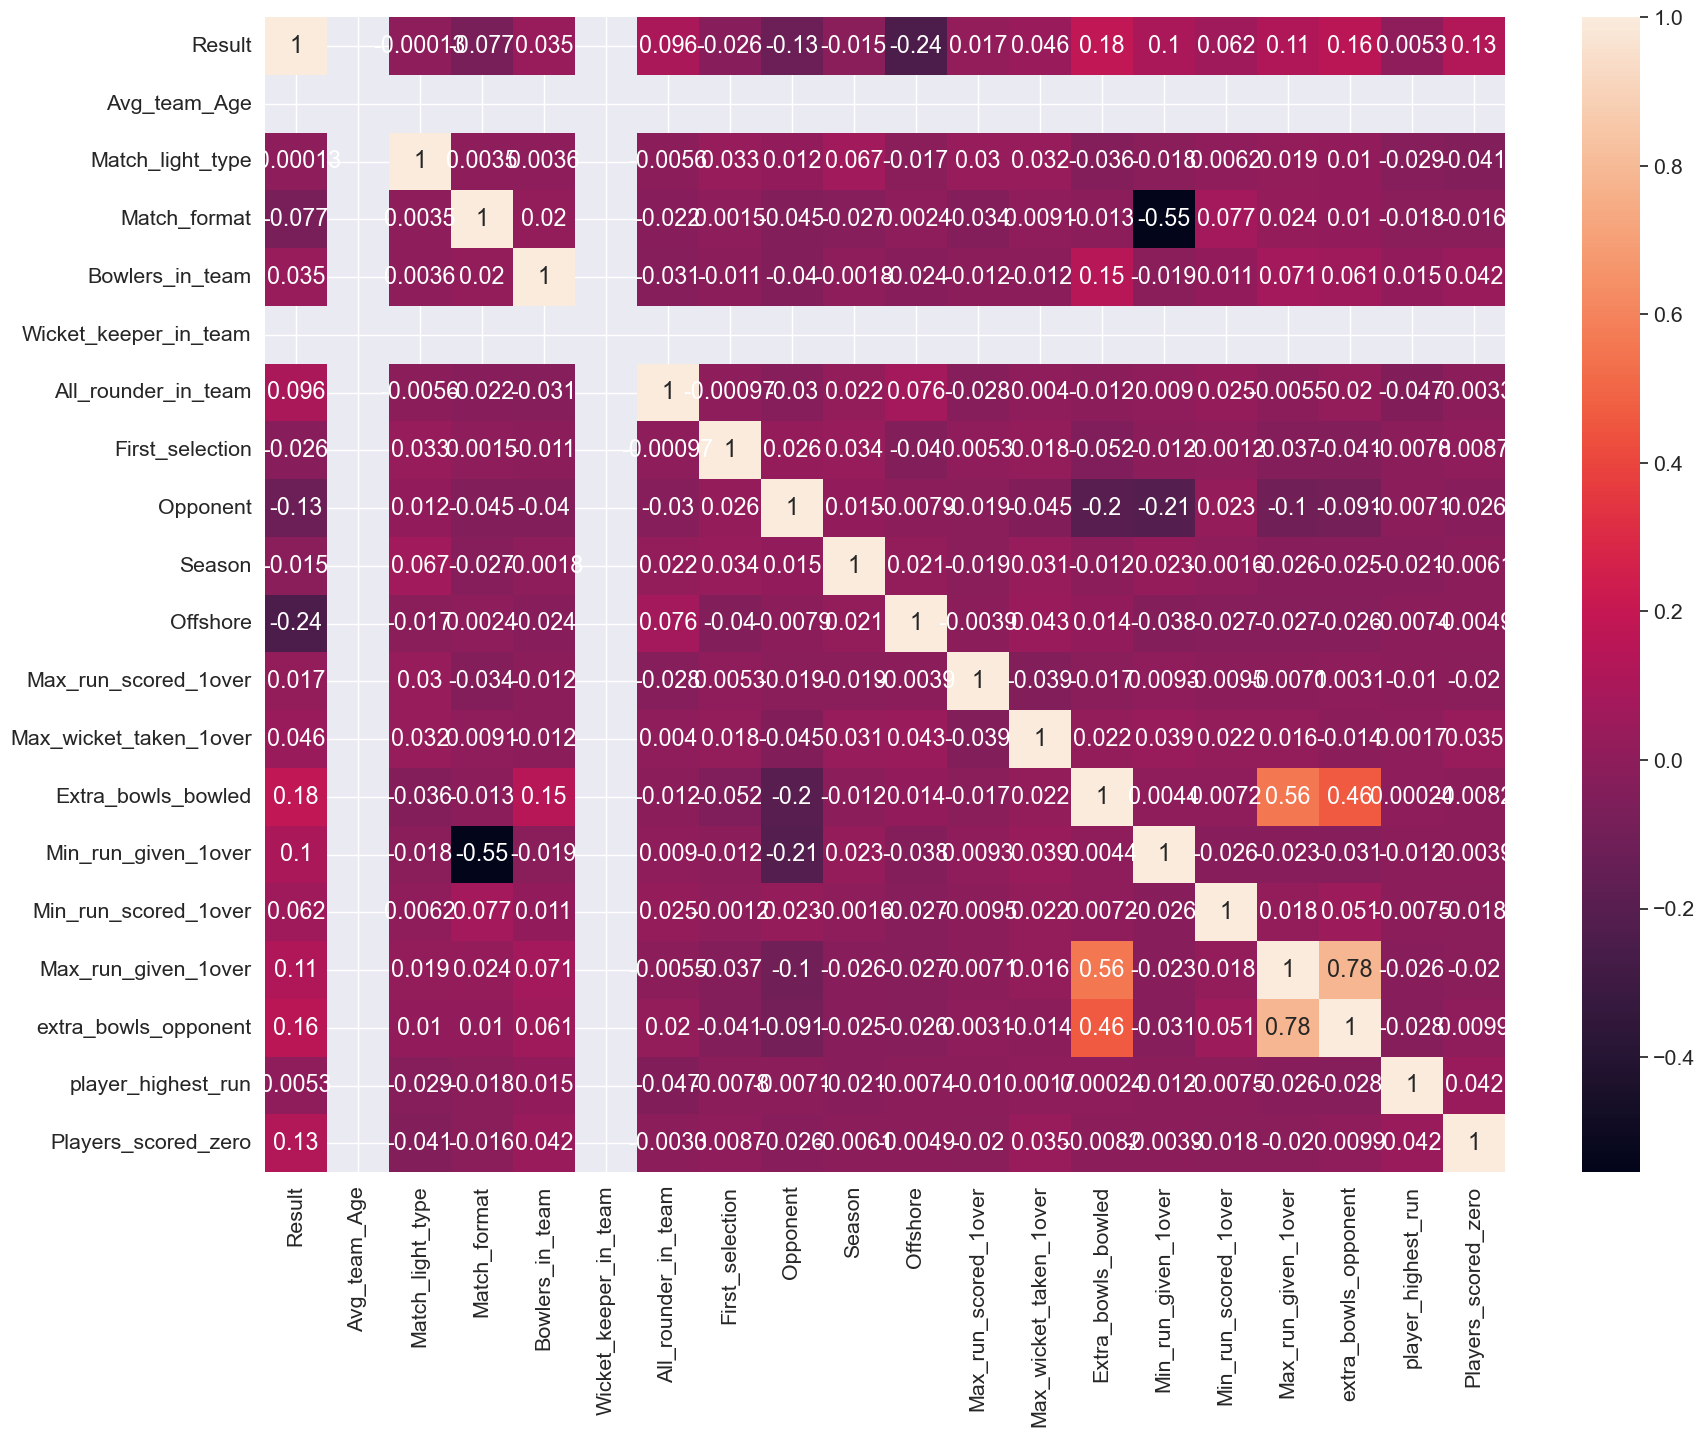

In [64]:
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
sns.heatmap(df_c2.corr(), annot=True)

The correlation among the variables improved after imputing missing values and outlier removal

f) Addition of new variables (if required)

Feature Selection:
    The optimal machine learning problem approach is to perform extensive EDA on dataset and understand
properties of the predictors before even getting into training models on these variables. However, this is not
always possible. Sometimes the dataset has lot many variables; sometimes even hundreds or even thousands of
variables, which can quickly outrun human comprehension.
Feature selection is the process of tuning down the number of predictor variables used by the models you build.
For example, when faced with two models with the same or nearly the same score, but with the latter model
using more variables, your immediate instinct should be to choose the one with fewer variables. That model is
simpler to train, simpler to understand, easier to run, and less time consuming.
Lets start with feature selection methods & validate them back using manual feature selection using backward
elimination approach:

a. To check the unbalanced dat

In [65]:
# Copy all the predictor variables into X dataframe
X = df_c2.drop('Result', axis=1)
# Copy target into the y dataframe.
y = df_c2['Result']

In [66]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Result, dtype: int64

In [67]:
y.value_counts()

1    2457
0     473
Name: Result, dtype: int64

In [68]:
y.value_counts(normalize=True)

1    0.838567
0    0.161433
Name: Result, dtype: float64

The data of the target variable is unbalanced as it depicts targetvariable=1 for 83.8% of the cases and 16.2% for
targetvariable=0. The data for the target variable=1 can be randomly considered upto 70 percent of the entire
dataset to make it balanced data. The model predicts quite good for train and test data considering 70-30 split
rather than 80-20 split of the tarrget variable

KNN CLUSTER

In [69]:
from sklearn.cluster import KMeans

In [70]:
k_means = KMeans(n_clusters = 3)
y_predicted = k_means.fit_predict(df_sc_cl[['Match_format']])
y_predicted

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [71]:
df_sc_cl['cluster'] = y_predicted
df_sc_cl.head()

Result  Avg_team_Age  Match_light_type  Match_format  Bowlers_in_team  \
0       0          30.0                 0             0              3.0   
1       1          30.0                 0             1              3.0   
2       0          30.0                 1             1              3.0   
3       1          30.0                 0             0              2.0   
4       0          30.0                 2             0              1.0   

   Wicket_keeper_in_team  All_rounder_in_team  First_selection  Opponent  \
0                      1                  3.0                1         6   
1                      1                  4.0                0         8   
2                      1                  2.0                1         8   
3                      1                  2.0                1         3   
4                      1                  3.0                1         6   

   Season  ...  Max_run_scored_1over  Max_wicket_taken_1over  \
0       1  ...                  13.0                       3   
1       1  ...                  12.0                       1   
2       0  ...                  14.0                       4   
3       1  ...                  15.0                       4   
4       1  ...                  12.0                       4   

   Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                 0.0                    2                   3.0   
1                 0.0                    0                   3.0   
2                 0.0                    0                   3.0   
3                 0.0                    2                   3.0   
4                 0.0                    0                   3.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                   0.0                54.0   
1                  6.0                   0.0                69.0   
2                  6.0                   0.0                69.0   
3                  6.0                   0.0                73.0   
4                  6.0                   0.0                80.0   

   Players_scored_zero  cluster  
0                    2        0  
1                    1        1  
2                    2        1  
3                    2        0  
4                    2        0  

[5 rows x 21 columns]

In [72]:
df_sc_cl['cluster'].value_counts()

0    1935
1     870
2     125
Name: cluster, dtype: int64

In [73]:
df_c2['Match_format'].value_counts()

0    1935
1     870
2     125
Name: Match_format, dtype: int64

In [74]:
df_ODI = df_c2.loc[df_c2['Match_format'] == 0]

In [75]:
df_ODI.head()

Result  Avg_team_Age  Match_light_type  Match_format  Bowlers_in_team  \
0       0          30.0                 0             0              3.0   
3       1          30.0                 0             0              2.0   
4       0          30.0                 2             0              1.0   
5       1          30.0                 2             0              3.0   
7       1          30.0                 2             0              3.0   

   Wicket_keeper_in_team  All_rounder_in_team  First_selection  Opponent  \
0                      1                  3.0                1         6   
3                      1                  2.0                1         3   
4                      1                  3.0                1         6   
5                      1                  4.0                0         6   
7                      1                  2.0                0         3   

   Season  Offshore  Max_run_scored_1over  Max_wicket_taken_1over  \
0       1         0                  13.0                       3   
3       1         0                  15.0                       4   
4       1         0                  12.0                       4   
5       1         0                  15.0                       3   
7       1         0                  16.0                       3   

   Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
0                 0.0                    2                   3.0   
3                 0.0                    2                   3.0   
4                 0.0                    0                   3.0   
5                 0.0                    5                   4.0   
7                 0.0                    4                   1.0   

   Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
0                  6.0                   0.0                54.0   
3                  6.0                   0.0                73.0   
4                  6.0                   0.0                80.0   
5                  6.0                   0.0                97.0   
7                  6.0                   0.0                33.0   

   Players_scored_zero  
0                    2  
3                    2  
4                    2  
5                    2  
7                    2

In [76]:
df_ODI.shape

(1935, 20)

In [77]:
df_T20 = df_c2.loc[df_c2['Match_format'] == 1]

In [78]:
df_T20.head()

Result  Avg_team_Age  Match_light_type  Match_format  Bowlers_in_team  \
1        1          30.0                 0             1              3.0   
2        0          30.0                 1             1              3.0   
6        0          30.0                 1             1              2.0   
9        1          30.0                 0             1              3.0   
10       0          30.0                 1             1              3.0   

    Wicket_keeper_in_team  All_rounder_in_team  First_selection  Opponent  \
1                       1                  4.0                0         8   
2                       1                  2.0                1         8   
6                       1                  2.0                0         8   
9                       1                  4.0                0         8   
10                      1                  2.0                1         8   

    Season  Offshore  Max_run_scored_1over  Max_wicket_taken_1over  \
1        1         0                  12.0                       1   
2        0         1                  14.0                       4   
6        1         1                  12.0                       3   
9        1         0                  12.0                       1   
10       1         1                  14.0                       4   

    Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
1                  0.0                    0                   3.0   
2                  0.0                    0                   3.0   
6                  0.0                    0                   4.0   
9                  0.0                    0                   3.0   
10                 0.0                    0                   3.0   

    Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
1                   6.0                   0.0                69.0   
2                   6.0                   0.0                69.0   
6                   6.0                   0.0                70.0   
9                   6.0                   0.0                69.0   
10                  6.0                   0.0                69.0   

    Players_scored_zero  
1                     1  
2                     2  
6                     2  
9                     1  
10                    2

In [79]:
df_T20.shape

(870, 20)

In [80]:
df_test = df_c2.loc[df_c2['Match_format'] == 2]

In [81]:
df_test.head()

Result  Avg_team_Age  Match_light_type  Match_format  Bowlers_in_team  \
20        0          30.0                 0             2              2.0   
29        0          30.0                 0             2              2.0   
164       0          30.0                 0             2              1.0   
166       1          30.0                 1             2              3.0   
190       0          30.0                 0             2              1.0   

     Wicket_keeper_in_team  All_rounder_in_team  First_selection  Opponent  \
20                       1                  1.0                1         0   
29                       1                  1.0                1         0   
164                      1                  4.0                1         0   
166                      1                  1.0                1         0   
190                      1                  4.0                1         0   

     Season  Offshore  Max_run_scored_1over  Max_wicket_taken_1over  \
20        1         0                  12.0                       3   
29        1         0                  12.0                       3   
164       0         0                  11.0                       3   
166       0         0                  14.0                       4   
190       0         0                  11.0                       3   

     Extra_bowls_bowled  Min_run_given_1over  Min_run_scored_1over  \
20                  1.0                    3                   4.0   
29                  1.0                    3                   4.0   
164                 1.0                    2                   3.0   
166                 3.0                    2                   3.0   
190                 1.0                    2                   3.0   

     Max_run_given_1over  extra_bowls_opponent  player_highest_run  \
20                   6.0                   0.0                52.0   
29                   6.0                   0.0                52.0   
164                  6.0                   0.0                58.0   
166                  6.0                   2.0                59.0   
190                  6.0                   0.0                58.0   

     Players_scored_zero  
20                     1  
29                     1  
164                    0  
166                    2  
190                    0

In [82]:
df_test.shape

(125, 20)

Scaling the Data predictors and response variable

In [83]:
# Copy all the predictor variables into predictors dataframe
predictors = df_c2.drop('Result', axis=1)
# Copy target into the response dataframe.
response = df_c2['Result']

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.
columns)

In [85]:
df_sc = pd.concat([scaled_predictors, response], axis = 1)

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Splitting the data into train and test sets using SMOTE

In [87]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.36, random_state = 2)

In [88]:
!pip install imblearn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /Users/sreeashritdande/anaconda3/lib/python3.11/site-packages/scikit_learn-1.2.2.dist-info/*
    /Users/sreeashritdande/anaconda3/lib/python3.11/site-packages/sklearn/*
Proceed (Y/n)? 

In [91]:
from imblearn import under_sampling, over_sampling

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (/Users/sreeashritdande/anaconda3/lib/python3.11/site-packages/sklearn/utils/_param_validation.py)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
X_train.head()

In [ ]:
df_sc.head()

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

MODEL BUILDING - OVERALL


MODEL 1: DecisionTreeClassifier (DTC)

Building a Decision Tree Classifier - Fitting DTC

In [ ]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
}
dtcl = DecisionTreeClassifier(random_state=2)
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [ ]:
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid
#{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 450}

In [ ]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot_total','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))
tree_regularized.close()
dot_data

Variable Importance

In [ ]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

Predicting on Training and Test dataset

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

Getting the Predicted Classes and Probs

In [ ]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

In [ ]:
pd.DataFrame(ytest_predict_prob).shape

Performance metrics - DTC

Evlaution parameters for train and test data

Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train, ytrain_predict)

In [ ]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,y_train)
cart_train_acc

In [ ]:
cart_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

In [ ]:
print(classification_report(y_train, ytrain_predict))

Confusion matrix and classification metrics for test data

In [ ]:
confusion_matrix(y_test, ytest_predict)

In [ ]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,y_test)
cart_test_acc

In [ ]:
cart_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

In [ ]:
print(classification_report(y_test, ytest_predict))

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Train Data and Test Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALUATION - AUC AND ROC - DTC

AUC and ROC FOR TRAIN DATA AND TEST DATA

In [ ]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(y_train, probs)
print('AUC TRAIN DATA: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.',label = 'Training Data')
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(y_test, probs)
print('AUC TEST DATA: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.',label = 'Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

METHOD TO CALCULATE WIN PERCENTAGE FOR ALL MODELS

From confusion matrix, we obtain TP(True Positive) ,FP(False Positive), TN(True Negative) and FN(False
Neagtive).

Loss = FN/ (FN + TN)

Oppurtunity Loss = FP / (FP+TP)

Total loss = 0.95 Loss + 0.05 Opportunity Loss

Total win = 1 - Total loss

Total win% = Total win * 100


INFERENCE - DTC

Total Win percentage for Train Data = 76.90% Total Win percentage for Test Data = 85.40%

MODEL 2: RANDOM FOREST CLASSIFIER

Building a Random Forest Classifier - RFC

Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have
higher execution time, so the best values that came after the search are directly put in Param_grid.

In [ ]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [50],## 10,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}
rfcl = RandomForestClassifier(random_state=2)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

Predicting the Training and Testing dat

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

RF Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train,ytrain_predict)

In [ ]:
rf_train_acc=best_grid.score(X_train,y_train)
rf_train_acc

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

RF Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test data

In [ ]:
confusion_matrix(y_test,ytest_predict)

In [ ]:
rf_test_acc=best_grid.score(X_test,y_test)
rf_test_acc

In [ ]:
print(classification_report(y_test,ytest_predict))

In [ ]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Train and test Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALUATION - AUC AND ROC, Variable Importance - Random Forest

AUC- ROC of RF model for train and test data

In [ ]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('AUC TRAIN DATA', rf_train_auc)
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('AUC TEST DATA', rf_test_auc)

In [ ]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


INFERENCE

Total Win percentage for Train Data = 84.25% Total Win percentage for Test Data = 85.31%

MODEL 3: NEURAL NETWORK CLASSIFIER

Building a Neural Network Classifier

Grid Search for finding out the optimal values for the hyper parameters

In [ ]:
param_grid = {
    'hidden_layer_sizes': [200], # 50,200,300
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01],
}
nncl = MLPClassifier(random_state=2)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)

In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

Predicting the Training and Testing data

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

NN Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train,ytrain_predict)

In [ ]:
nn_train_acc=best_grid.score(X_train,y_train)
nn_train_acc

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

NN Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test data

In [ ]:
confusion_matrix(y_test,ytest_predict)

In [ ]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

In [ ]:
print(classification_report(y_test,ytest_predict))

In [ ]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALUATION - AUC AND ROC - NNC

AUC- ROC of RF model for train and test dat

In [ ]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [ ]:
best_grid.score

INFERENCE - NNC

Total Win percentage for Train Data = 74.75% Total Win percentage for Test Data = 88.62%


MODEL 4: Logistic Regression model

FITTING THE LOGISTIC REGRESSION MODEL

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,
n_jobs=2)
model.fit(X_train, y_train)

Predicting on Training and Test dataset

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

Getting the Predicted Classes and Probs

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

In [ ]:
 #Accuracy - Training Data
model.score(X_train, y_train)

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)

Logistic Regression- Performance Evaluation on Train data


Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train, ytrain_predict)

In [ ]:
print(classification_report(y_train, ytrain_predict))

Logistic Regression- Performance Evaluation on Test data

Confusion matrix and classification metrics for test data

In [ ]:
confusion_matrix(y_test, ytest_predict)

In [ ]:
print(classification_report(y_test, ytest_predict))

Classification metrics report for train and test data

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALUATION - AUC AND ROC - Logistic Regression

AUC and ROC for the training and test data

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [ ]:
pred_prob_train[:,1]

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - Logistic Regression

Total Win percentage for Train Data = 76.71% Total Win percentage for Test Data = 88.35%

MODEL 5: LDA model

Fitting the LDA model

In [ ]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

Getting the Predicted Classes and Probs

In [ ]:
Ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(Ytest_predict_prob).head()

In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)

PERFORMANCE METRICS - LDA

Classification metrics report of train and test data

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALUATION - LDA

AUC-ROC for the training and test data

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [ ]:
pred_prob_train[:,1]

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - LDA MODEL

Total Win percentage for Train Data = 76.48% Total Win percentage for Test Data = 88.31%


MODEL 6 : Naive Bayes with SMOTE
    
Fitting Naive Bayes with SMOTE model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train, y_train)

Performance Metrics - Naive Bayes

Performance Matrix on train data set with Naive Bayes

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = NB_SM_model.predict(X_train)
model_score = NB_SM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

Performance Matrix on test data set with Naive Bayes

In [ ]:
## Performance Matrix on test data set
y_test_predict = NB_SM_model.predict(X_test)
model_score = NB_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test dat

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

Model Evaluation - Naive Bayes

AUC-ROC for the training and test data using Naive -Bayes

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - Naive Bayes Model with SMOTE

Total Win percentage for Train Data = 73.68% Total Win percentage for Test Data =87.15%

MODEL 7 : KNN Model with SMOTE
    
Fitting KNN Model with SMOTE


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train,y_train)

Performance Metrics - KNN with Smote

Performance Matrix on train data set using KNN

In [ ]:
## Performance Matrix on train data set
 
y_train_predict = KNN_SM_model.predict(X_train)
model_score = KNN_SM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

Performance Matrix on test data set using KNN

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using KN

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

Model Evaluation - KNN with Smote

AUC-ROC for the training and test data using KNN

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Inference - KNN with Smote

Total Win percentage for Train Data = 76.48% Total Win percentage for Test Data = 88.31%

MODEL TUNING - OVERALL DATASET

MODEL TUNING: Fitting Random Forest Tuned Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=2)
RF_model.fit(X_train, y_train)

Performance Metrics Random Forest Tuned Model

Performance Matrix on train data set using RF Classifier

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

Performance Matrix on test data set using RF Classifier

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using tuned RF CLassifier

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL INTERPRETATION - RF CLASSIFIER - TUNED MODEL

AUC-ROC for the training and test data using RF Classifier

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - RANDOM FOREST CLASSIFIER - TUNED MODEL

Total Win percentage for Train Data = 100% Total Win percentage for Test Data = 95.39%

MODEL TUNING - Bagging Model

MODEL TUNING: Fitting Bagging Model

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=2)
Bagging_model.fit(X_train, y_train)

Performance Metrics : Bagging Model

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')


Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALAUATION - BAGGING MODEL

AUC-ROC for the training and test data using Bagging


In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - BAGGING MODEL

Total Win percentage for Train Data = 99.82% Total Win percentage for Test Data = 94.29%

## MODEL TUNING - GRADIENT BOOSTING

FITTING THE GRADIENT BOOSTING OVERALL MODEL

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=2)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=2)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using Gradient Boosting

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data');
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALUATION - GRADIENT BOOSTING

AUC-ROC for the training and test data using Gradient Boosting

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - GRADIENT BOOSTING MODEL

Total Win percentage for Train Data = 99.82% Total Win percentage for Test Data = 87.67%

MODEL TUNING - Ada Boost

FITTING THE AdaBoost Model

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=2)
ADB_model.fit(X_train,y_train)

PERFORMANCE Metrics - ADA Boost

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Classification metrics report of train and test data using Ada Boost

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

MODEL EVALUATION - Ada Boost

AUC-ROC for the training and test data using Ada Boost

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - GRADIENT BOOSTING MODEL

Total Win percentage for Train Data = 86.31% Total Win percentage for Test Data = 87.74%

Splitting the data into train and test sets for test format

In [ ]:
df_T20.shape

In [ ]:
# Copy all the predictor variables into predictors dataframe
predictors = df_ODI.drop('Result', axis=1)
# Copy target into the response dataframe.
response = df_ODI['Result']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.
columns)

In [ ]:
df_ODI_sc = pd.concat([scaled_predictors, response], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response,
test_size = 0.36, random_state = 2)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
df_ODI_sc.head()

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df_ODI[['Result', 'Avg_team_Age','Match_light_type','Match_format','Bowlers_in_team','All_rounder_in_team',
'Wicket_keeper_in_team', 'First_selection','Opponent','Season','Offshore','Max_run_scored_1over','Max_wicket_taken_1over',
'Extra_bowls_bowled','Min_run_given_1over','Min_run_scored_1over','Max_run_given_1over','extra_bowls_opponent',
'player_highest_run','Players_scored_zero']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

MODEL BUILDING FOR ODI MATCH FORMAT

MODEL 2: RANDOM FOREST CLASSIFIER

Building a Random Forest Classifier

Grid Search for finding out the optimal values for the hyper parameters
Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have
higher execution time, so the best values that came after the search are directly put in Param_grid.

In [ ]:
df_test.shape

In [ ]:
param_grid = {
    'max_depth': [10],## 20,30,40
    'max_features': [6],## 7,8,9
    'min_samples_leaf': [50],## 10,100
    'min_samples_split': [50], ## 60,70
    'n_estimators': [300] ## 100,200
}
rfcl = RandomForestClassifier(random_state=2)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)


In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_


In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

Predicting the Training and Testing data

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

RF Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train dat

In [ ]:
confusion_matrix(y_train,ytrain_predict)

In [ ]:
rf_train_acc=best_grid.score(X_train,y_train)
rf_train_acc

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

RF Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test data

RF Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test data

In [ ]:
confusion_matrix(y_test,ytest_predict)

In [ ]:
rf_test_acc=best_grid.score(X_test,y_test)
rf_test_acc

In [ ]:
print(classification_report(y_test,ytest_predict))

In [ ]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Train and test Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');


AUC- ROC of RF model for train and test data

In [ ]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('AUC TRAIN DATA', rf_train_auc)
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('AUC TEST DATA', rf_test_auc)

INFERENCE - 

Total Win percentage for Train Data = 84.75% Total Win percentage for Test Data = 88.80%

In [ ]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


MODEL 3: NEURAL NETWORK CLASSIFIER
    
Building a Neural Network Classifier

Grid Search for finding out the optimal values for the hyper parameters

In [ ]:
param_grid = {
    'hidden_layer_sizes': [200], # 50,200,300
    'max_iter': [2500], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01],
}
nncl = MLPClassifier(random_state=2)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01)

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

Predicting the Training and Testing data

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

NN Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train,ytrain_predict)

In [ ]:
nn_train_acc=best_grid.score(X_train,y_train)
nn_train_acc

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

NN Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test dat

In [ ]:
confusion_matrix(y_test,ytest_predict)

In [ ]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

In [ ]:
print(classification_report(y_test,ytest_predict))

In [ ]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC- ROC of RF model for train and test data

In [ ]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)


In [ ]:
best_grid.score

INFERENCE - NEURAL NETWORK CLASSIFIER

Total Win percentage for Train Data = 83.79% Total Win percentage for Test Data = 90.56%

MODEL TUNING FOR ODI MATCH FORMAT

MODEL TUNING: MODEL-1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=2)
RF_model.fit(X_train, y_train)

Performance Matrix on train data set using RF Classifier

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

Performance Matrix on test data set using RF Classifier

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC-ROC for the training and test data using RF Classifier

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - RANDOM FOREST CLASSIFIER

Total Win percentage for Train Data = 100% Total Win percentage for Test Data = 95.79%

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, X_train, y_train, cv=10)
scores

In [ ]:
scores = cross_val_score(RF_model, X_test, y_test, cv=10)
scores

MODEL TUNING - Bagging ModeL

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=2)
Bagging_model.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using Bagging

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC-ROC for the training and test data using Bagging


In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - BAGGING CLASSIFIER

Total Win percentage for Train Data = 99.72% Total Win percentage for Test Data = 95.09%

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Bagging_model, X_train, y_train, cv=3)
scores

In [ ]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=3)
scores

In [ ]:
# Copy all the predictor variables into predictors dataframe
predictors = df_T20.drop('Result', axis=1)
# Copy target into the response dataframe.
response = df_T20['Result']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.
columns)

In [ ]:
df_T20_sc = pd.concat([scaled_predictors, response], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response,
test_size = 0.35, random_state = 2)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
df_T20_sc.head()

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df_ODI[['Result', 'Avg_team_Age','Bowlers_in_team','All_rounder_in_team',
'Wicket_keeper_in_team', 'First_selection','Opponent','Season','Offshore','Max_run_scored_1over','Max_wicket_taken_1over',
'Extra_bowls_bowled','Min_run_given_1over','Min_run_scored_1over','Max_run_given_1over','extra_bowls_opponent',
'player_highest_run','Players_scored_zero']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)

MODEL BUILDING FOR T20 MATCH FORMAT

MODEL 1 : KNN Model with SMOTE


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train,y_train)

Performance Matrix on train data set using KNN

In [ ]:
## Performance Matrix on train data set
y_train_predict = KNN_SM_model.predict(X_train)
model_score = KNN_SM_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

Performance Matrix on test data set using KNN

In [ ]:
## Performance Matrix on test data set
y_test_predict = KNN_SM_model.predict(X_test)
model_score = KNN_SM_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using KNN

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC-ROC for the training and test data using KNN


In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - KNN MODEL WITH SMOTE

Total Win percentage for Train Data = 98.56% Total Win percentage for Test Data = 87.97%

MODEL 2: RANDOM FOREST CLASSIFIER

Building a Random Forest Classifier

Grid Search for finding out the optimal values for the hyper parameters

Due to large volume of data, trying for different parameter values in the gridsearch with higher cv value will have
higher execution time, so the best values that came after the search are directly put in Param_grid.


In [ ]:
param_grid = {
'max_depth': [10],## 20,30,40
'max_features': [6],## 7,8,9
'min_samples_leaf': [50],## 10,100
'min_samples_split': [50], ## 60,70
'n_estimators': [300] ## 100,200
}
rfcl = RandomForestClassifier(random_state=2)
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

Predicting the Training and Testing data

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

RF Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train,ytrain_predict)

In [ ]:
rf_train_acc=best_grid.score(X_train,y_train)
rf_train_acc

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
rf_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

RF Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test data

In [ ]:
confusion_matrix(y_test,ytest_predict)

In [ ]:
rf_test_acc=best_grid.score(X_test,y_test)
rf_test_acc

In [ ]:
print(classification_report(y_test,ytest_predict))

In [ ]:
rf_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Train and test Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC- ROC of RF model for train and test dat

In [ ]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('AUC TRAIN DATA', rf_train_auc)
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('AUC TEST DATA', rf_test_auc)

INFERENCE - RANDOM FOREST CLASSIFIER

Total Win percentage for Train Data = 79.61% Total Win percentage for Test Data = 82.81%

In [ ]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

MODEL 3: NEURAL NETWORK CLASSIFIER
    
Building a Neural Network Classifier

Grid Search for finding out the optimal values for the hyper parameters

In [ ]:
param_grid = {
'hidden_layer_sizes': [200], # 50,200,300
'max_iter': [2500], #5000,2500
'solver': ['adam'], #sgd
'tol': [0.01],
}
nncl = MLPClassifier(random_state=2)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

Predicting the Training and Testing data

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

NN Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train,ytrain_predict)

In [ ]:
nn_train_acc=best_grid.score(X_train,y_train)
nn_train_acc

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

NN Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test dat

In [ ]:
confusion_matrix(y_test,ytest_predict)

In [ ]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

In [ ]:
print(classification_report(y_test,ytest_predict))

In [ ]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC- ROC of RF model for train and test dat

In [ ]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

INFERENCE - NN CLASSIFIER

Total Win percentage for Train Data = 88.18% Total Win percentage for Test Data = 86.83%

In [ ]:
best_grid.score

MODEL TUNING FOR T20 FORMAT

MODEL TUNING: MODEL-1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=2)
RF_model.fit(X_train, y_train)

Performance Matrix on train data set using RF Classifier

In [ ]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

Performance Matrix on test data set using RF Classifier

In [ ]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using tuned RF CLassifier

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC-ROC for the training and test data using RF Classifier

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

INFERENCE - RANDOM FOREST CLASSIFIER

Total Win percentage for Train Data = 100% Total Win percentage for Test Data = 93.94%

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_model, X_train, y_train, cv=3)
scores

In [ ]:
scores = cross_val_score(RF_model, X_test, y_test, cv=3)
scores

MODEL TUNING - Bagging Model

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
cart = RandomForestClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=2)
Bagging_model.fit(X_train, y_train)

INFERENCE - NN CLASSIFIER

Total Win percentage for Train Data = 88.18% Total Win percentage for Test Data = 86.83%

In [ ]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using Bagging

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC-ROC for the training and test data using Bagging

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Bagging_model, X_train, y_train, cv=10)
scores

In [ ]:
scores = cross_val_score(Bagging_model, X_test, y_test, cv=10)
scores

In [ ]:
# Copy all the predictor variables into predictors dataframe
predictors = df_test.drop('Result', axis=1)
# Copy target into the response dataframe.
response = df_test['Result']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.
columns)

In [ ]:
df_test_sc = pd.concat([scaled_predictors, response], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response,
test_size = 0.35, random_state = 2)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [ ]:
df_test_sc.head()

In [ ]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

VIf

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df_test[['Result', 'Avg_team_Age','Match_light_type','Bowlers_in_team','All_rounder_in_team',
'Wicket_keeper_in_team', 'First_selection','Opponent','Season','Offshore','Max_run_scored_1over','Max_wicket_taken_1over',
'Extra_bowls_bowled','Min_run_given_1over','Min_run_scored_1over','Max_run_given_1over','extra_bowls_opponent',
'player_highest_run','Players_scored_zero']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]
print(vif_data)


MODEL BUILDING FOR Test MATCH FORMAT

MODEL 1: Logistic Regression model

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,
n_jobs=2)
model.fit(X_train, y_train)

Predicting on Training and Test datase

In [ ]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

Getting the Predicted Classes and Probs

In [ ]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

In [ ]:
# Accuracy - Training Data
model.score(X_train, y_train)

In [ ]:
# Accuracy - Test Data
model.score(X_test, y_test)

Logistic Regression Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train data

In [ ]:
confusion_matrix(y_train, ytrain_predict)

In [ ]:
print(classification_report(y_train, ytrain_predict))

Logistic Regression Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test data

In [ ]:
confusion_matrix(y_test, ytest_predict)

In [ ]:
print(classification_report(y_test, ytest_predict))

CLassification metrics report for train and test dat

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC and ROC for the training and test dat

In [ ]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)
# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [ ]:
pred_prob_train[:,1]

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
df_or=pd.DataFrame({'odds_ratio':(np.exp(model.coef_).T).tolist(),'variable':X.columns.tolist()})
df_or['odds_ratio'] = df_or['odds_ratio'].str.get(0)

In [ ]:
df_or=df_or.sort_values('odds_ratio', ascending=False)
df_or

MODEL 2: NEURAL NETWORK CLASSIFIER

Building a Neural Network Classifier

Grid Search for finding out the optimal values for the hyper parameters


In [ ]:
param_grid = {
'hidden_layer_sizes': [200], # 50,200,300
'max_iter': [2500], #5000,2500
'solver': ['adam'], #sgd
'tol': [0.01],
}
nncl = MLPClassifier(random_state=2)
grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 10)


In [ ]:
grid_search.fit(X_train, y_train)
grid_search.best_params_
#{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [ ]:
best_grid = grid_search.best_estimator_
best_grid

Predicting the Training and Testing data

In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

NN Model Performance Evaluation on Train data

Confusion matrix and classification metrics for train data


In [ ]:
confusion_matrix(y_train,ytrain_predict)

In [ ]:
nn_train_acc=best_grid.score(X_train,y_train)
nn_train_acc

In [ ]:
print(classification_report(y_train,ytrain_predict))

In [ ]:
nn_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

NN Model Performance Evaluation on Test data

Confusion matrix and classification metrics for test dat

In [ ]:
confusion_matrix(y_test,ytest_predict)

In [ ]:
nn_test_acc=best_grid.score(X_test,y_test)
nn_test_acc

In [ ]:
print(classification_report(y_test,ytest_predict))

In [ ]:
nn_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',cmap='Reds',ax=a[0][1]);
a[0][1].set_title('Test Data');


AUC- ROC of RF model for train and test data

In [ ]:
nn_train_fpr, nn_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)
nn_test_fpr, nn_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [ ]:
best_grid.score

MODEL TUNING FOR TEST MATCH FORMAT

MODEL TUNING - GRADIENT BOOSTING


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=2)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))

In [ ]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))

Classification metrics report of train and test data using Gradient Boosting

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test dat

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');


AUC-ROC for the training and test data using Gradient Boosting

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gbcl, X_train, y_train, cv=10)
scores

In [ ]:
scores = cross_val_score(gbcl, X_test, y_test, cv=10)
scores

MODEL TUNING - Ada Boos

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=2)
ADB_model.fit(X_train,y_train)

In [ ]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

In [ ]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Classification metrics report of train and test data using Ada Boost

In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,y_train_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,y_test_predict),'\n')

Heatmaps for confusion matrix of train and test data

In [ ]:
f,a = plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)
#Plotting confusion matrix for the different models for the Training Data
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,y_train_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,y_test_predict)),annot=True,fmt='.5g',cmap='coolwarm',ax=a[0][1]);
a[0][1].set_title('Test Data');

AUC-ROC for the training and test data using Ada Boost

In [ ]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,y_train_predict)
print('AUC for the Training Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,y_test_predict)
print('AUC for the Test Data: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_predict)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ADB_model, X_train, y_train, cv=10)
scores

In [ ]:
scores = cross_val_score(ADB_model, X_test, y_test, cv=10)
scores